# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:46:39.226455: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:46:42.007023
2025-04-15 00:46:42.007023


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:46:37"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

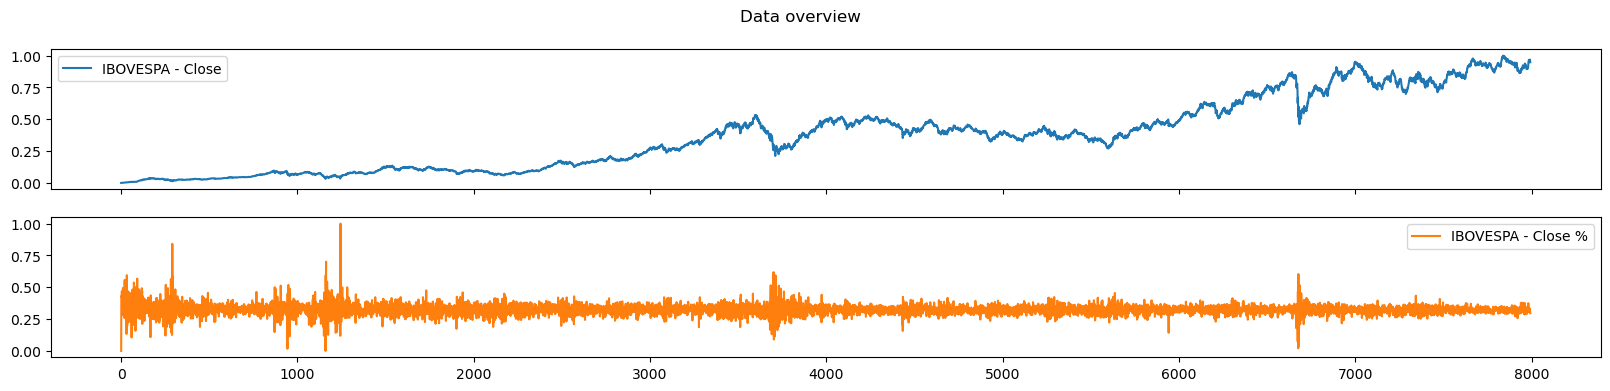

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

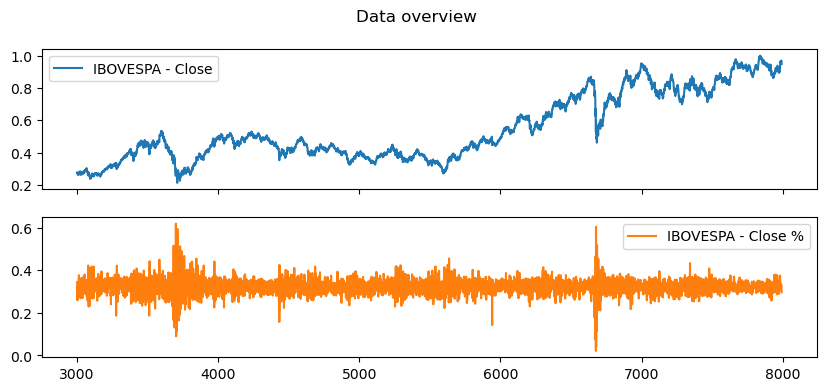

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

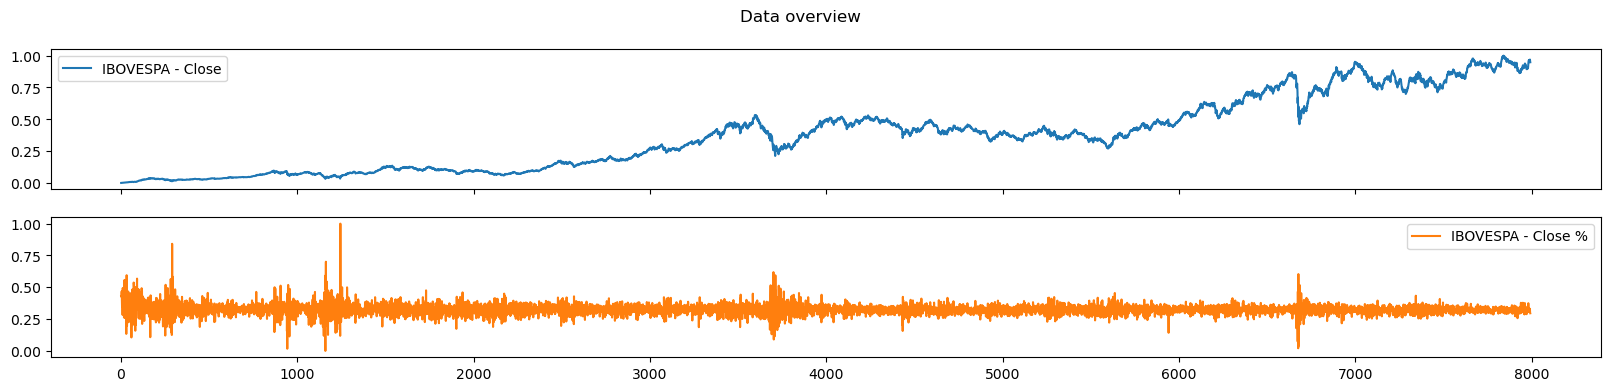

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

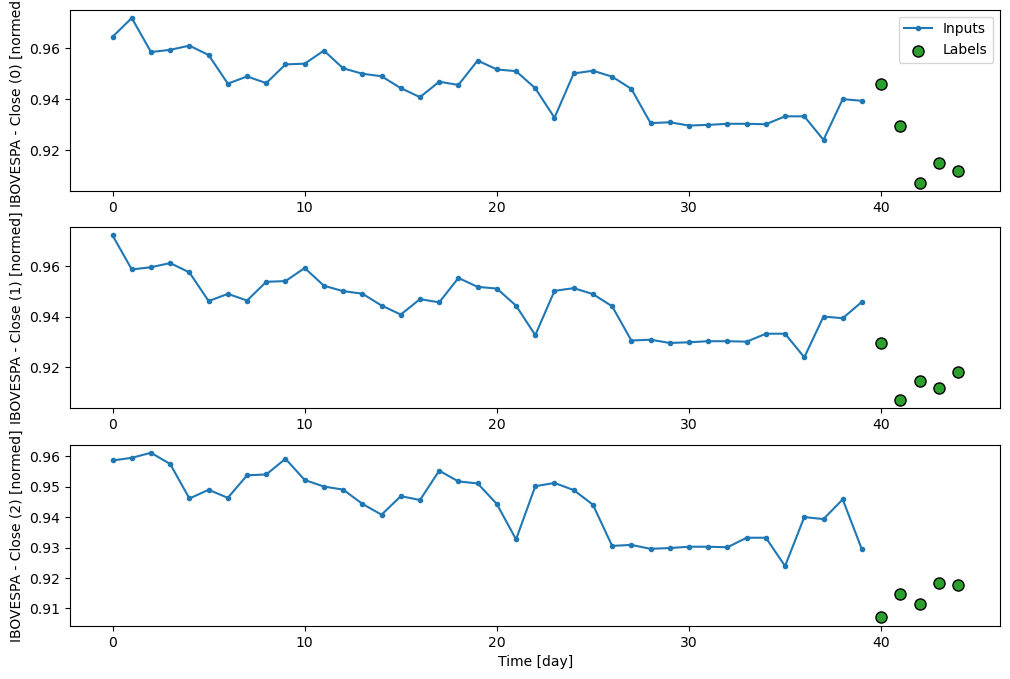

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:05 2s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 88.5735 - mean_squared_error: 1.0739e-04 - root_mean_squared_error: 0.0103 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 79.7852 - mean_squared_error: 1.5685e-04 - root_mean_squared_error: 0.0123

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 74.3499 - mean_squared_error: 1.7318e-04 - root_mean_squared_error: 0.0129

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 69.2900 - mean_squared_error: 1.7372e-04 - root_mean_squared_error: 0.0130

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 64.6381 - mean_squared_error: 1.6860e-04 - root_mean_squared_error: 0.0128

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 60.4662 - mean_squared_error: 1.6170e-04 - root_mean_squared_error: 0.0126

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.9162 - mean_squared_error: 1.5736e-04 - root_mean_squared_error: 0.0124

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 53.9647 - mean_squared_error: 1.5568e-04 - root_mean_squared_error: 0.0124

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.5870 - mean_squared_error: 1.5669e-04 - root_mean_squared_error: 0.0124

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 49.6760 - mean_squared_error: 1.5959e-04 - root_mean_squared_error: 0.0125

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.0148 - mean_squared_error: 1.6325e-04 - root_mean_squared_error: 0.0127

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.5847 - mean_squared_error: 1.7280e-04 - root_mean_squared_error: 0.0130

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.3354 - mean_squared_error: 1.8667e-04 - root_mean_squared_error: 0.0134

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 44.1666 - mean_squared_error: 1.9803e-04 - root_mean_squared_error: 0.0138

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 43.0988 - mean_squared_error: 2.0776e-04 - root_mean_squared_error: 0.0141

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 42.0944 - mean_squared_error: 2.1556e-04 - root_mean_squared_error: 0.0144

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 41.1599 - mean_squared_error: 2.2171e-04 - root_mean_squared_error: 0.0146

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 40.3218 - mean_squared_error: 2.2773e-04 - root_mean_squared_error: 0.0148

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 39.6026 - mean_squared_error: 2.3827e-04 - root_mean_squared_error: 0.0151

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 38.9658 - mean_squared_error: 2.5377e-04 - root_mean_squared_error: 0.0155

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 38.3471 - mean_squared_error: 2.6717e-04 - root_mean_squared_error: 0.0159

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 37.7477 - mean_squared_error: 2.7896e-04 - root_mean_squared_error: 0.0162

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 37.3105 - mean_squared_error: 2.8693e-04 - root_mean_squared_error: 0.0164

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 36.7519 - mean_squared_error: 2.9801e-04 - root_mean_squared_error: 0.0167

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 36.2234 - mean_squared_error: 3.1067e-04 - root_mean_squared_error: 0.0170

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 35.7277 - mean_squared_error: 3.2759e-04 - root_mean_squared_error: 0.0174

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 35.2554 - mean_squared_error: 3.4752e-04 - root_mean_squared_error: 0.0179

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 34.7949 - mean_squared_error: 3.6635e-04 - root_mean_squared_error: 0.0183

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 34.3734 - mean_squared_error: 3.9917e-04 - root_mean_squared_error: 0.0189

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 34.0081 - mean_squared_error: 4.5254e-04 - root_mean_squared_error: 0.0198

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 33.6636 - mean_squared_error: 5.1017e-04 - root_mean_squared_error: 0.0207

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 33.3507 - mean_squared_error: 5.8874e-04 - root_mean_squared_error: 0.0217

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 33.0550 - mean_squared_error: 6.7122e-04 - root_mean_squared_error: 0.0228

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 32.7678 - mean_squared_error: 7.5054e-04 - root_mean_squared_error: 0.0238

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 32.4949 - mean_squared_error: 8.2958e-04 - root_mean_squared_error: 0.0249

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 32.2279 - mean_squared_error: 9.0416e-04 - root_mean_squared_error: 0.0258

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 31.9645 - mean_squared_error: 9.7351e-04 - root_mean_squared_error: 0.0267

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 31.7036 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0275    

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 31.4532 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0283

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 31.2094 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0291

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 30.9708 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0298

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 30.7362 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0305

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 30.5049 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0311

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 30.2826 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 30.0648 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 29.8548 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 29.6519 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 29.4551 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 29.2625 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 29.0729 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 28.8848 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 28.6986 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 28.5226 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 28.3505 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 28.1840 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 28.0199 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 27.8574 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 27.6964 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0392

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 27.5369 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 27.4587 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399 - val_loss: 0.1413 - val_mean_absolute_error: 0.1413 - val_mean_absolute_percentage_error: 15.0413 - val_mean_squared_error: 0.0207 - val_root_mean_squared_error: 0.1438 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.6183 - mean_absolute_error: 0.6183 - mean_absolute_percentage_error: 8209.7119 - mean_squared_error: 0.3824 - root_mean_squared_error: 0.6184

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6119 - mean_absolute_error: 0.6119 - mean_absolute_percentage_error: 5809.1421 - mean_squared_error: 0.3748 - root_mean_squared_error: 0.6122 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5958 - mean_absolute_error: 0.5958 - mean_absolute_percentage_error: 4710.4106 - mean_squared_error: 0.3564 - root_mean_squared_error: 0.5966

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5767 - mean_absolute_error: 0.5767 - mean_absolute_percentage_error: 4128.7046 - mean_squared_error: 0.3515 - root_mean_squared_error: 0.5907

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5766 - mean_absolute_error: 0.5766 - mean_absolute_percentage_error: 3795.3210 - mean_squared_error: 0.3860 - root_mean_squared_error: 0.6177

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5697 - mean_absolute_error: 0.5697 - mean_absolute_percentage_error: 3522.4402 - mean_squared_error: 0.3945 - root_mean_squared_error: 0.6250

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5570 - mean_absolute_error: 0.5570 - mean_absolute_percentage_error: 3286.8171 - mean_squared_error: 0.3907 - root_mean_squared_error: 0.6224

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5403 - mean_absolute_error: 0.5403 - mean_absolute_percentage_error: 3077.8628 - mean_squared_error: 0.3807 - root_mean_squared_error: 0.6144

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5218 - mean_absolute_error: 0.5218 - mean_absolute_percentage_error: 2893.3313 - mean_squared_error: 0.3684 - root_mean_squared_error: 0.6039

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5030 - mean_absolute_error: 0.5030 - mean_absolute_percentage_error: 2730.3770 - mean_squared_error: 0.3553 - root_mean_squared_error: 0.5924

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4848 - mean_absolute_error: 0.4848 - mean_absolute_percentage_error: 2586.1963 - mean_squared_error: 0.3423 - root_mean_squared_error: 0.5806

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4675 - mean_absolute_error: 0.4675 - mean_absolute_percentage_error: 2457.7205 - mean_squared_error: 0.3299 - root_mean_squared_error: 0.5689

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4512 - mean_absolute_error: 0.4512 - mean_absolute_percentage_error: 2342.4612 - mean_squared_error: 0.3180 - root_mean_squared_error: 0.5576

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4358 - mean_absolute_error: 0.4358 - mean_absolute_percentage_error: 2238.5186 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5467

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4248 - mean_absolute_error: 0.4248 - mean_absolute_percentage_error: 2167.0364 - mean_squared_error: 0.2990 - root_mean_squared_error: 0.5388

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4111 - mean_absolute_error: 0.4111 - mean_absolute_percentage_error: 2079.2910 - mean_squared_error: 0.2891 - root_mean_squared_error: 0.5287

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 1999.1926 - mean_squared_error: 0.2798 - root_mean_squared_error: 0.5191

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3863 - mean_absolute_error: 0.3863 - mean_absolute_percentage_error: 1925.7712 - mean_squared_error: 0.2712 - root_mean_squared_error: 0.5100

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3751 - mean_absolute_error: 0.3751 - mean_absolute_percentage_error: 1858.1985 - mean_squared_error: 0.2630 - root_mean_squared_error: 0.5013

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3646 - mean_absolute_error: 0.3646 - mean_absolute_percentage_error: 1795.7783 - mean_squared_error: 0.2554 - root_mean_squared_error: 0.4930

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3547 - mean_absolute_error: 0.3547 - mean_absolute_percentage_error: 1737.9188 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4851

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3455 - mean_absolute_error: 0.3455 - mean_absolute_percentage_error: 1684.1459 - mean_squared_error: 0.2415 - root_mean_squared_error: 0.4775

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3368 - mean_absolute_error: 0.3368 - mean_absolute_percentage_error: 1633.9999 - mean_squared_error: 0.2351 - root_mean_squared_error: 0.4703

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3286 - mean_absolute_error: 0.3286 - mean_absolute_percentage_error: 1587.1111 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4634

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3208 - mean_absolute_error: 0.3208 - mean_absolute_percentage_error: 1543.1656 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4569

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3153 - mean_absolute_error: 0.3153 - mean_absolute_percentage_error: 1511.9722 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4521

102/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3100 - mean_absolute_error: 0.3100 - mean_absolute_percentage_error: 1482.1700 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4475

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 1444.4409 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4416

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2970 - mean_absolute_error: 0.2970 - mean_absolute_percentage_error: 1408.8303 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4359

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2910 - mean_absolute_error: 0.2910 - mean_absolute_percentage_error: 1375.1534 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4304

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1351.0944 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4265

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2815 - mean_absolute_error: 0.2815 - mean_absolute_percentage_error: 1320.4978 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4215

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1291.4330 - mean_squared_error: 0.1903 - root_mean_squared_error: 0.4167

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 1263.7795 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.4120

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 1237.4307 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.4075

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1212.2909 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.4032

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1188.2869 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3990

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1165.3334 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3949

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1143.3574 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3910

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2481 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 1127.4777 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3881

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1107.0618 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3844

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1087.4606 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3808

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1068.6261 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3773

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 1050.5115 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3738

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1033.0743 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3705

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1016.2806 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3673

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1000.0911 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3642

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 984.4762 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3611 

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 969.4046 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3582

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 954.8476 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3553

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 940.7753 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3525

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 927.1605 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3498

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 913.9799 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3471

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 901.2131 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3445

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 888.8453 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3420

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 876.8538 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3395

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 865.2217 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3371

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1995 - mean_absolute_error: 0.1995 - mean_absolute_percentage_error: 853.9310 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3348

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 842.9659 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3325

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 832.3118 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3302

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 821.9548 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3280

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 816.8939 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3270 - val_loss: 0.0733 - val_mean_absolute_error: 0.0733 - val_mean_absolute_percentage_error: 7.7744 - val_mean_squared_error: 0.0059 - val_root_mean_squared_error: 0.0770 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.5828 - mean_absolute_error: 0.5828 - mean_absolute_percentage_error: 7743.1753 - mean_squared_error: 0.3399 - root_mean_squared_error: 0.5830

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5795 - mean_absolute_error: 0.5795 - mean_absolute_percentage_error: 5489.5322 - mean_squared_error: 0.3361 - root_mean_squared_error: 0.5797

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5722 - mean_absolute_error: 0.5722 - mean_absolute_percentage_error: 4483.5498 - mean_squared_error: 0.3278 - root_mean_squared_error: 0.5725

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5620 - mean_absolute_error: 0.5620 - mean_absolute_percentage_error: 3968.1072 - mean_squared_error: 0.3169 - root_mean_squared_error: 0.5627

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5484 - mean_absolute_error: 0.5484 - mean_absolute_percentage_error: 3606.4573 - mean_squared_error: 0.3034 - root_mean_squared_error: 0.5501

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5362 - mean_absolute_error: 0.5362 - mean_absolute_percentage_error: 3384.6248 - mean_squared_error: 0.2922 - root_mean_squared_error: 0.5393

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5166 - mean_absolute_error: 0.5166 - mean_absolute_percentage_error: 3128.9011 - mean_squared_error: 0.2764 - root_mean_squared_error: 0.5235

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4957 - mean_absolute_error: 0.4957 - mean_absolute_percentage_error: 2909.3257 - mean_squared_error: 0.2612 - root_mean_squared_error: 0.5075

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4747 - mean_absolute_error: 0.4747 - mean_absolute_percentage_error: 2719.3657 - mean_squared_error: 0.2470 - root_mean_squared_error: 0.4921

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4545 - mean_absolute_error: 0.4545 - mean_absolute_percentage_error: 2554.2329 - mean_squared_error: 0.2340 - root_mean_squared_error: 0.4776

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4356 - mean_absolute_error: 0.4356 - mean_absolute_percentage_error: 2409.7737 - mean_squared_error: 0.2224 - root_mean_squared_error: 0.4641

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4181 - mean_absolute_error: 0.4181 - mean_absolute_percentage_error: 2282.4592 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4515

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4019 - mean_absolute_error: 0.4019 - mean_absolute_percentage_error: 2169.1987 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4398

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3869 - mean_absolute_error: 0.3869 - mean_absolute_percentage_error: 2067.8115 - mean_squared_error: 0.1936 - root_mean_squared_error: 0.4290

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3730 - mean_absolute_error: 0.3730 - mean_absolute_percentage_error: 1976.4974 - mean_squared_error: 0.1857 - root_mean_squared_error: 0.4189

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3601 - mean_absolute_error: 0.3601 - mean_absolute_percentage_error: 1893.8049 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.4095

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3482 - mean_absolute_error: 0.3482 - mean_absolute_percentage_error: 1818.5496 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.4007

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1749.7610 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3925

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3268 - mean_absolute_error: 0.3268 - mean_absolute_percentage_error: 1686.6250 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3847

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1628.4363 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3775

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3081 - mean_absolute_error: 0.3081 - mean_absolute_percentage_error: 1574.6106 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3706

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2997 - mean_absolute_error: 0.2997 - mean_absolute_percentage_error: 1524.6829 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3641

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2919 - mean_absolute_error: 0.2919 - mean_absolute_percentage_error: 1478.2054 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3579

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1434.8206 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3521

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 1394.2195 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3465

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2710 - mean_absolute_error: 0.2710 - mean_absolute_percentage_error: 1356.1333 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3413

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1320.3206 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3362

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 1286.5836 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3314

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1254.7373 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3268

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2483 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 1224.6344 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3225

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1196.1620 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3183

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1169.1556 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3144

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2347 - mean_absolute_error: 0.2347 - mean_absolute_percentage_error: 1143.4882 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.3105

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1119.0570 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.3069

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 1095.7711 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3033

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1073.5527 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2999

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1052.3256 - mean_squared_error: 0.1019 - root_mean_squared_error: 0.2966

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1032.0212 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2935

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 1012.5778 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2904

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 993.9432 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2874 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 976.0652 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2845

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 958.8956 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2817

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 942.3908 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2790

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 930.4243 - mean_squared_error: 0.0906 - root_mean_squared_error: 0.2771

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 914.9926 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2745

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 900.1257 - mean_squared_error: 0.0877 - root_mean_squared_error: 0.2720

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 885.7933 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2696

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 871.9653 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2673

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 858.6122 - mean_squared_error: 0.0838 - root_mean_squared_error: 0.2650

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 845.7095 - mean_squared_error: 0.0826 - root_mean_squared_error: 0.2628

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 833.2341 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2606

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 821.1653 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2585

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - mean_absolute_percentage_error: 809.4810 - mean_squared_error: 0.0792 - root_mean_squared_error: 0.2564

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 798.1654 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2544

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 787.1989 - mean_squared_error: 0.0771 - root_mean_squared_error: 0.2525

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 776.5670 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2506

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 766.2525 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2488

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1678 - mean_absolute_error: 0.1678 - mean_absolute_percentage_error: 756.2410 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2470

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 746.5181 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2453

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1645 - mean_absolute_error: 0.1645 - mean_absolute_percentage_error: 737.0707 - mean_squared_error: 0.0724 - root_mean_squared_error: 0.2436

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 730.1670 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2423 - val_loss: 0.0151 - val_mean_absolute_error: 0.0151 - val_mean_absolute_percentage_error: 1.5998 - val_mean_squared_error: 3.8674e-04 - val_root_mean_squared_error: 0.0197 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.3775 - mean_absolute_error: 0.3775 - mean_absolute_percentage_error: 5015.5039 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3776

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 3535.4141 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3712

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 2869.0188 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3625

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 2516.4551 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3518

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 2261.2542 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3389

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 2053.8108 - mean_squared_error: 0.1072 - root_mean_squared_error: 0.3252

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1885.1632 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.3125

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2855 - mean_absolute_error: 0.2855 - mean_absolute_percentage_error: 1744.0659 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.3008

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1624.6182 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2902

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2585 - mean_absolute_error: 0.2585 - mean_absolute_percentage_error: 1522.1406 - mean_squared_error: 0.0823 - root_mean_squared_error: 0.2805

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1433.4220 - mean_squared_error: 0.0778 - root_mean_squared_error: 0.2718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1355.6628 - mean_squared_error: 0.0738 - root_mean_squared_error: 0.2638

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1286.8059 - mean_squared_error: 0.0703 - root_mean_squared_error: 0.2565

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 1225.3682 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2497

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 1170.1825 - mean_squared_error: 0.0642 - root_mean_squared_error: 0.2435

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 1120.3232 - mean_squared_error: 0.0616 - root_mean_squared_error: 0.2377

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 1075.0562 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2324

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 1033.7866 - mean_squared_error: 0.0570 - root_mean_squared_error: 0.2274

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 995.9702 - mean_squared_error: 0.0550 - root_mean_squared_error: 0.2227 

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 969.6028 - mean_squared_error: 0.0536 - root_mean_squared_error: 0.2194

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1739 - mean_absolute_error: 0.1739 - mean_absolute_percentage_error: 936.8110 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2152

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1691 - mean_absolute_error: 0.1691 - mean_absolute_percentage_error: 906.4404 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2113

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1646 - mean_absolute_error: 0.1646 - mean_absolute_percentage_error: 878.2183 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.2075

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1603 - mean_absolute_error: 0.1603 - mean_absolute_percentage_error: 851.9072 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2040

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1563 - mean_absolute_error: 0.1563 - mean_absolute_percentage_error: 827.3113 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.2007

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 804.2634 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.1975

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 782.6151 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1945

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 762.2385 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1916

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - mean_absolute_percentage_error: 743.0208 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1888

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 724.8636 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1862

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 707.6802 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1837

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 691.3904 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1813

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 675.9220 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1790

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 661.2114 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1767

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 647.2015 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1746

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 633.8420 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1725

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 621.0875 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1706

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 608.8954 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1687

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 597.2274 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1668

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 586.0494 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1650

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 575.3298 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1633

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 565.0400 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1616

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 555.1543 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1600

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 545.6478 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1585

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 536.4989 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1569

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 527.6879 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1555

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 519.1950 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1540

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 511.0026 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1527

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 503.0938 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1513

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 495.4538 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1500

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 488.0687 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1487

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 480.9252 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1475

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 474.0113 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1463

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 467.3167 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1451

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 460.8304 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1440

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 454.5424 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1428

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 449.9518 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1420

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 445.4635 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1412

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 439.6327 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1402

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 433.9699 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1392

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 428.4720 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1382 - val_loss: 0.0358 - val_mean_absolute_error: 0.0358 - val_mean_absolute_percentage_error: 3.7946 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0386 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 2247.7803 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1696

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1603 - mean_absolute_error: 0.1603 - mean_absolute_percentage_error: 1557.7678 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1609 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 1230.5287 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1500

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 1037.3069 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1391

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 906.7361 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1302 

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 811.7565 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1232

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 736.8857 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1171

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 676.1121 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1118

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 625.6754 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1072

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 583.2059 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1031

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 546.9361 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0995

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 515.4631 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0963

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 487.8374 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0934

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 463.3795 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0907

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 441.5611 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0883

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 421.9736 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0860

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 404.2705 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0840

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 388.1877 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0821

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 373.5022 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0803

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 360.0214 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0786

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 347.6033 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0770

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 336.1213 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0756

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 325.4680 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0742

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 315.5495 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0729

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 306.2910 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0717

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 297.6279 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0705

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 289.5009 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0694

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 281.8596 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0684

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 274.6609 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0674

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 267.8698 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0664

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 261.4519 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0655

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 255.3816 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0647

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 251.0376 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0642

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 245.4989 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0635

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 240.2303 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0628

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 235.2105 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0621

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 230.4240 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0615

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 225.8527 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0608

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 221.4810 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0603

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 217.2975 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0597

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 213.2877 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0591

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 209.4421 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0586

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 205.7502 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 202.2022 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0576

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 198.7900 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 195.5085 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0566

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 192.3511 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0562

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 189.3076 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0558

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 186.3705 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 183.5346 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0550

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 180.7952 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0546

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 178.1472 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0543

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 175.5852 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0539

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 173.1066 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 170.7063 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0533

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 168.3812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 166.1276 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0528

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 163.9420 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0526

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 161.8208 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 159.7609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0521

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 158.7546 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0520 - val_loss: 0.0182 - val_mean_absolute_error: 0.0182 - val_mean_absolute_percentage_error: 1.9818 - val_mean_squared_error: 4.6991e-04 - val_root_mean_squared_error: 0.0217 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 3252.7107 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2450

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 2288.6003 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2398

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 1848.4436 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2322

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1607.2700 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2227

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 1428.0359 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2120

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1943 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 1288.3143 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.2021

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 1177.7994 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1934

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 1107.7433 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1875

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 1046.5699 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1821

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 976.0972 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1755 

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 915.6854 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1697

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1464 - mean_absolute_error: 0.1464 - mean_absolute_percentage_error: 863.3482 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1643

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1404 - mean_absolute_error: 0.1404 - mean_absolute_percentage_error: 817.3561 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1595

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 776.5853 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1551

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 740.1517 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1510

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 707.3862 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1473

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 677.7610 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1438

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 650.8340 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1406

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 626.2394 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1376

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 609.1374 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1355

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 587.9088 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1328

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 573.0533 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1309

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 554.5177 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1285

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 537.2880 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1262

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 521.2248 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1240

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 506.2088 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1220

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 492.1365 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1201

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 478.9176 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1182

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 466.4742 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1165

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 454.7379 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1148

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 443.6495 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1132

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 433.1545 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1117

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 423.2035 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1102

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 413.7534 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1088

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 404.7652 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1074

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 396.2045 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1061

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 388.0410 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1049

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 380.2467 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1037

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 372.7955 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1025

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 365.6642 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1014

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 358.8322 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1003

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 352.2800 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0993

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 345.9904 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0983

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 339.9477 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0973

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 334.1365 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0964

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 329.9223 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0957

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 325.8260 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0950

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 320.5385 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0941

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 315.4397 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0933

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 310.5190 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0924

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 305.7671 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0916

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 301.1751 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0908

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 296.7346 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0901

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 292.4378 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0894

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 288.2785 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0886

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 284.2494 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0879

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 280.3442 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0873

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 276.5570 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0866

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 272.8827 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0860

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 269.3159 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0853

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 265.8518 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0847

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 263.3214 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0843 - val_loss: 0.0218 - val_mean_absolute_error: 0.0218 - val_mean_absolute_percentage_error: 2.3038 - val_mean_squared_error: 6.4145e-04 - val_root_mean_squared_error: 0.0253 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 1601.1685 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1207

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 1111.4097 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1147 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 873.0298 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1061 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 731.3001 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0978

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 640.1232 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0918

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 573.2668 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0869

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 520.8369 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0827

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 478.3011 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0790

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 443.0206 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0759

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 420.2506 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0737

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 393.8101 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0711

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 370.9294 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0688

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 350.8709 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0667

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 333.1255 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0648

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 317.3018 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0631

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 303.0918 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0615

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 290.2584 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0600

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 278.6114 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0586

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 267.9868 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0574

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 258.2451 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0562

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 251.4520 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0553

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 243.0031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0542

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 235.1735 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 227.8948 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0523

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 221.1074 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

 99/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 214.7624 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0506

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 208.8152 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 203.2289 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 197.9711 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 193.0131 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 188.3319 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 183.9023 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 179.7032 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0458

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 175.7166 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 171.9249 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0447

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 168.3135 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 164.8698 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0438

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 161.5815 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 158.4375 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 155.4282 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 152.5446 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 149.7789 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 147.1241 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 144.5731 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 142.7243 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 140.3408 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 138.0452 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 135.8325 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 133.6980 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 131.6376 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 129.6473 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 127.7235 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 125.8627 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 124.0623 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 122.3191 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 120.6303 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 118.9930 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 117.4051 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 116.2451 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 115.4860 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 115.1106 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 114.3680 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 112.9160 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1079 - val_mean_squared_error: 1.7447e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 1112.7593 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0845

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 830.7496 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0804  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 661.3198 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0744

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 556.9245 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 488.7887 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 439.7400 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 400.9209 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 369.5573 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 343.3758 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0537

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 321.1633 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0518

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 308.1253 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0507

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 290.7468 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0491

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 270.8191 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0472

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 257.8606 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0459

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 246.2683 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0448

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 235.8253 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 226.3517 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 217.7098 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 209.7927 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 202.5056 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 193.6475 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 187.5646 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 181.9086 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 176.6365 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 171.7048 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 167.0782 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 161.3362 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 158.6305 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 154.7608 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 151.1004 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 147.6314 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 144.3385 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 141.2089 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 138.2293 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 135.3888 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 132.6780 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 130.9385 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 127.6107 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 125.2398 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 122.9681 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 120.7883 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 118.0148 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 116.0275 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 113.4928 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 111.6723 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 109.9168 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 108.2231 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 106.5875 - mean_squared_error: 9.8636e-04 - root_mean_squared_error: 0.0282

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 105.0070 - mean_squared_error: 9.7278e-04 - root_mean_squared_error: 0.0280

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 103.4786 - mean_squared_error: 9.5964e-04 - root_mean_squared_error: 0.0278

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 101.9997 - mean_squared_error: 9.4693e-04 - root_mean_squared_error: 0.0276

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 100.5679 - mean_squared_error: 9.3462e-04 - root_mean_squared_error: 0.0274

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 99.1807 - mean_squared_error: 9.2268e-04 - root_mean_squared_error: 0.0272 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 97.3972 - mean_squared_error: 9.0734e-04 - root_mean_squared_error: 0.0269

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 96.5327 - mean_squared_error: 8.9993e-04 - root_mean_squared_error: 0.0268

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 95.2680 - mean_squared_error: 8.8909e-04 - root_mean_squared_error: 0.0266

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 94.4454 - mean_squared_error: 8.8204e-04 - root_mean_squared_error: 0.0265

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 93.6389 - mean_squared_error: 8.7512e-04 - root_mean_squared_error: 0.0264

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 92.8479 - mean_squared_error: 8.6834e-04 - root_mean_squared_error: 0.0263

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 91.3109 - mean_squared_error: 8.5521e-04 - root_mean_squared_error: 0.0261

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 89.8307 - mean_squared_error: 8.4260e-04 - root_mean_squared_error: 0.0259

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 88.4038 - mean_squared_error: 8.3047e-04 - root_mean_squared_error: 0.0257

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 87.0272 - mean_squared_error: 8.1880e-04 - root_mean_squared_error: 0.0255

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 85.6984 - mean_squared_error: 8.0758e-04 - root_mean_squared_error: 0.0253

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 84.4148 - mean_squared_error: 7.9682e-04 - root_mean_squared_error: 0.0251

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 83.1740 - mean_squared_error: 7.8648e-04 - root_mean_squared_error: 0.0250

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 81.9737 - mean_squared_error: 7.7652e-04 - root_mean_squared_error: 0.0248

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 81.0994 - mean_squared_error: 7.6965e-04 - root_mean_squared_error: 0.0247

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 79.9662 - mean_squared_error: 7.6083e-04 - root_mean_squared_error: 0.0246

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 78.8685 - mean_squared_error: 7.5246e-04 - root_mean_squared_error: 0.0244

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 77.8046 - mean_squared_error: 7.4449e-04 - root_mean_squared_error: 0.0243

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 76.7729 - mean_squared_error: 7.3693e-04 - root_mean_squared_error: 0.0242

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 75.7719 - mean_squared_error: 7.2969e-04 - root_mean_squared_error: 0.0241

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 74.8001 - mean_squared_error: 7.2279e-04 - root_mean_squared_error: 0.0240

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 73.8573 - mean_squared_error: 7.1625e-04 - root_mean_squared_error: 0.0239 - val_loss: 0.0146 - val_mean_absolute_error: 0.0146 - val_mean_absolute_percentage_error: 1.5417 - val_mean_squared_error: 3.2916e-04 - val_root_mean_squared_error: 0.0181 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 1086.4961 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0830

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 812.9820 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0792  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 648.4745 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0737

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 522.0814 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 463.2683 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 419.1092 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0599

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 383.8242 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0572

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 354.9521 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0549

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 330.6747 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0528

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 309.9195 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0510

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 297.6927 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0499

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 281.2880 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0484

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 266.8526 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0470

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 254.0363 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 242.5513 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 228.9686 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 219.8752 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 211.5692 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 203.9517 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 196.9361 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 190.4576 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 184.4539 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 178.8758 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 173.6787 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 168.8188 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 162.8022 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 157.2552 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 153.3683 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 149.6939 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 145.0948 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 140.8055 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 136.7947 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 133.0344 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 129.5017 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 126.1766 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 123.0416 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 120.0814 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 117.2794 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 114.6225 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 112.0993 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 109.6989 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 107.4126 - mean_squared_error: 9.9694e-04 - root_mean_squared_error: 0.0284

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 105.2322 - mean_squared_error: 9.7849e-04 - root_mean_squared_error: 0.0281

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 103.1501 - mean_squared_error: 9.6091e-04 - root_mean_squared_error: 0.0278

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 101.1589 - mean_squared_error: 9.4408e-04 - root_mean_squared_error: 0.0276

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 99.2529 - mean_squared_error: 9.2795e-04 - root_mean_squared_error: 0.0273 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 97.4263 - mean_squared_error: 9.1247e-04 - root_mean_squared_error: 0.0271

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 95.6743 - mean_squared_error: 8.9762e-04 - root_mean_squared_error: 0.0268

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 94.4067 - mean_squared_error: 8.8689e-04 - root_mean_squared_error: 0.0267

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 92.7744 - mean_squared_error: 8.7307e-04 - root_mean_squared_error: 0.0264

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 91.2050 - mean_squared_error: 8.5977e-04 - root_mean_squared_error: 0.0262

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 89.6949 - mean_squared_error: 8.4701e-04 - root_mean_squared_error: 0.0260

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 88.2405 - mean_squared_error: 8.3473e-04 - root_mean_squared_error: 0.0258

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 86.8385 - mean_squared_error: 8.2291e-04 - root_mean_squared_error: 0.0256

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 85.4859 - mean_squared_error: 8.1151e-04 - root_mean_squared_error: 0.0254

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 84.1801 - mean_squared_error: 8.0054e-04 - root_mean_squared_error: 0.0253

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 82.9187 - mean_squared_error: 7.9000e-04 - root_mean_squared_error: 0.0251

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 81.6994 - mean_squared_error: 7.7986e-04 - root_mean_squared_error: 0.0249

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 80.5198 - mean_squared_error: 7.7008e-04 - root_mean_squared_error: 0.0248

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 79.3789 - mean_squared_error: 7.6112e-04 - root_mean_squared_error: 0.0246

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 78.2741 - mean_squared_error: 7.5256e-04 - root_mean_squared_error: 0.0245

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 77.2038 - mean_squared_error: 7.4437e-04 - root_mean_squared_error: 0.0243

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 76.1661 - mean_squared_error: 7.3655e-04 - root_mean_squared_error: 0.0242

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 75.1597 - mean_squared_error: 7.2908e-04 - root_mean_squared_error: 0.0241

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 74.1831 - mean_squared_error: 7.2190e-04 - root_mean_squared_error: 0.0240

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 73.4693 - mean_squared_error: 7.1671e-04 - root_mean_squared_error: 0.0239

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 72.5423 - mean_squared_error: 7.1003e-04 - root_mean_squared_error: 0.0238 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0473 - val_mean_squared_error: 1.5640e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 1006.9857 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0769

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 689.0177 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0711 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 528.4181 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 441.2634 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 385.2230 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 343.9016 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0516

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 311.8813 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0490

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 286.0252 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 264.7149 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0449

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 246.7754 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0432

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 231.4540 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 218.1793 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 206.5498 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 196.2549 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 187.0739 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 178.8298 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 171.3793 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 164.6142 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 158.4391 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 152.7728 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 147.5525 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 142.7234 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 138.2415 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 134.0685 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 130.1725 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 126.5254 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 123.1028 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 119.8847 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 116.8529 - mean_squared_error: 9.8192e-04 - root_mean_squared_error: 0.0285

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 113.9932 - mean_squared_error: 9.5913e-04 - root_mean_squared_error: 0.0281

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 111.2900 - mean_squared_error: 9.3772e-04 - root_mean_squared_error: 0.0278

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 108.7289 - mean_squared_error: 9.1754e-04 - root_mean_squared_error: 0.0274

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 106.2984 - mean_squared_error: 8.9848e-04 - root_mean_squared_error: 0.0271

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 103.9882 - mean_squared_error: 8.8042e-04 - root_mean_squared_error: 0.0268

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 102.3289 - mean_squared_error: 8.6747e-04 - root_mean_squared_error: 0.0266

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 100.2079 - mean_squared_error: 8.5097e-04 - root_mean_squared_error: 0.0263

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 98.1849 - mean_squared_error: 8.3532e-04 - root_mean_squared_error: 0.0261 

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 96.2526 - mean_squared_error: 8.2039e-04 - root_mean_squared_error: 0.0258

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 94.4045 - mean_squared_error: 8.0611e-04 - root_mean_squared_error: 0.0256

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 92.6352 - mean_squared_error: 7.9242e-04 - root_mean_squared_error: 0.0253

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 90.9393 - mean_squared_error: 7.7929e-04 - root_mean_squared_error: 0.0251

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.3124 - mean_squared_error: 7.6670e-04 - root_mean_squared_error: 0.0249

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 87.7507 - mean_squared_error: 7.5466e-04 - root_mean_squared_error: 0.0247

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 86.2498 - mean_squared_error: 7.4307e-04 - root_mean_squared_error: 0.0245

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 84.8062 - mean_squared_error: 7.3194e-04 - root_mean_squared_error: 0.0243

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.4169 - mean_squared_error: 7.2129e-04 - root_mean_squared_error: 0.0241

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.0784 - mean_squared_error: 7.1104e-04 - root_mean_squared_error: 0.0239

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.7879 - mean_squared_error: 7.0120e-04 - root_mean_squared_error: 0.0238

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 79.5424 - mean_squared_error: 6.9170e-04 - root_mean_squared_error: 0.0236

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 78.3398 - mean_squared_error: 6.8260e-04 - root_mean_squared_error: 0.0234

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.1779 - mean_squared_error: 6.7386e-04 - root_mean_squared_error: 0.0233

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.0543 - mean_squared_error: 6.6547e-04 - root_mean_squared_error: 0.0231

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 74.9672 - mean_squared_error: 6.5749e-04 - root_mean_squared_error: 0.0230

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.9155 - mean_squared_error: 6.5014e-04 - root_mean_squared_error: 0.0229

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.8969 - mean_squared_error: 6.4317e-04 - root_mean_squared_error: 0.0227

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.9096 - mean_squared_error: 6.3649e-04 - root_mean_squared_error: 0.0226

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.9524 - mean_squared_error: 6.3014e-04 - root_mean_squared_error: 0.0225

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 70.0238 - mean_squared_error: 6.2408e-04 - root_mean_squared_error: 0.0224

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 69.1225 - mean_squared_error: 6.1828e-04 - root_mean_squared_error: 0.0223

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.2473 - mean_squared_error: 6.1276e-04 - root_mean_squared_error: 0.0222

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 67.8198 - mean_squared_error: 6.1008e-04 - root_mean_squared_error: 0.0222 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1384 - val_mean_squared_error: 1.8732e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 1024.2603 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0785

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 702.5663 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0730  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 540.6772 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 450.9507 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 393.0187 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 350.3798 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0530

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 317.3955 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0503

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 290.8389 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0480

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 268.9785 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 250.5972 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 238.6245 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 224.5721 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 212.3034 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 201.4731 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 191.8389 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 183.2057 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 175.4208 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 168.3619 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 161.9288 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 156.0340 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 150.6100 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 145.5997 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 140.9552 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 136.6358 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 132.6069 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 128.8391 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 125.3061 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 121.9867 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 118.8618 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 115.9153 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 113.1328 - mean_squared_error: 9.8420e-04 - root_mean_squared_error: 0.0283

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 110.4984 - mean_squared_error: 9.6265e-04 - root_mean_squared_error: 0.0280

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 107.9999 - mean_squared_error: 9.4231e-04 - root_mean_squared_error: 0.0277

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 105.6265 - mean_squared_error: 9.2308e-04 - root_mean_squared_error: 0.0274

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 103.3683 - mean_squared_error: 9.0482e-04 - root_mean_squared_error: 0.0271

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 101.2173 - mean_squared_error: 8.8750e-04 - root_mean_squared_error: 0.0268

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 99.1659 - mean_squared_error: 8.7105e-04 - root_mean_squared_error: 0.0265 

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 97.2068 - mean_squared_error: 8.5538e-04 - root_mean_squared_error: 0.0263

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 95.3333 - mean_squared_error: 8.4038e-04 - root_mean_squared_error: 0.0260

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.5399 - mean_squared_error: 8.2602e-04 - root_mean_squared_error: 0.0258

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 91.8211 - mean_squared_error: 8.1223e-04 - root_mean_squared_error: 0.0256

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.1725 - mean_squared_error: 7.9902e-04 - root_mean_squared_error: 0.0253

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 88.5901 - mean_squared_error: 7.8637e-04 - root_mean_squared_error: 0.0251

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 87.0693 - mean_squared_error: 7.7420e-04 - root_mean_squared_error: 0.0249

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.6069 - mean_squared_error: 7.6251e-04 - root_mean_squared_error: 0.0247

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 84.1994 - mean_squared_error: 7.5130e-04 - root_mean_squared_error: 0.0245

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.8434 - mean_squared_error: 7.4051e-04 - root_mean_squared_error: 0.0243

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 81.8586 - mean_squared_error: 7.3269e-04 - root_mean_squared_error: 0.0242

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.8998 - mean_squared_error: 7.2508e-04 - root_mean_squared_error: 0.0241

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.6602 - mean_squared_error: 7.1527e-04 - root_mean_squared_error: 0.0239

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.4631 - mean_squared_error: 7.0585e-04 - root_mean_squared_error: 0.0237

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.3060 - mean_squared_error: 6.9680e-04 - root_mean_squared_error: 0.0236

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.1868 - mean_squared_error: 6.8808e-04 - root_mean_squared_error: 0.0234

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.1042 - mean_squared_error: 6.8004e-04 - root_mean_squared_error: 0.0233

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.0563 - mean_squared_error: 6.7245e-04 - root_mean_squared_error: 0.0232

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.0412 - mean_squared_error: 6.6526e-04 - root_mean_squared_error: 0.0231

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.0573 - mean_squared_error: 6.5841e-04 - root_mean_squared_error: 0.0229

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.1032 - mean_squared_error: 6.5190e-04 - root_mean_squared_error: 0.0228

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 70.1774 - mean_squared_error: 6.4567e-04 - root_mean_squared_error: 0.0227

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 69.2787 - mean_squared_error: 6.3973e-04 - root_mean_squared_error: 0.0226

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 68.4066 - mean_squared_error: 6.3408e-04 - root_mean_squared_error: 0.0226 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2779 - val_mean_squared_error: 2.3127e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 928.7166 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0710

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 635.1483 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0656

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 486.7696 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0588

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 406.5512 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 354.6505 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0504

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 316.5628 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0475

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 287.0762 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 263.3093 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 243.7220 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0413

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 227.2399 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 213.1695 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 200.9761 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 190.2875 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 180.8217 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 172.3773 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 164.7935 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 157.9392 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 151.7139 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 146.0294 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 140.8125 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 136.0072 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 131.5623 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 127.4372 - mean_squared_error: 9.8523e-04 - root_mean_squared_error: 0.0288

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 124.5316 - mean_squared_error: 9.6307e-04 - root_mean_squared_error: 0.0285

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 120.8842 - mean_squared_error: 9.3529e-04 - root_mean_squared_error: 0.0280

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 117.4722 - mean_squared_error: 9.0937e-04 - root_mean_squared_error: 0.0276

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 114.2717 - mean_squared_error: 8.8509e-04 - root_mean_squared_error: 0.0271

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 111.2639 - mean_squared_error: 8.6243e-04 - root_mean_squared_error: 0.0267

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 108.4317 - mean_squared_error: 8.4135e-04 - root_mean_squared_error: 0.0264

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 105.7608 - mean_squared_error: 8.2179e-04 - root_mean_squared_error: 0.0260

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 103.2383 - mean_squared_error: 8.0357e-04 - root_mean_squared_error: 0.0257

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 100.8497 - mean_squared_error: 7.8641e-04 - root_mean_squared_error: 0.0254

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 98.5838 - mean_squared_error: 7.7024e-04 - root_mean_squared_error: 0.0251 

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 96.4311 - mean_squared_error: 7.5497e-04 - root_mean_squared_error: 0.0249

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 94.3825 - mean_squared_error: 7.4049e-04 - root_mean_squared_error: 0.0246

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 92.4308 - mean_squared_error: 7.2675e-04 - root_mean_squared_error: 0.0244

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 90.5692 - mean_squared_error: 7.1372e-04 - root_mean_squared_error: 0.0241

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 88.7911 - mean_squared_error: 7.0131e-04 - root_mean_squared_error: 0.0239

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 87.0903 - mean_squared_error: 6.8942e-04 - root_mean_squared_error: 0.0237

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 85.4621 - mean_squared_error: 6.7804e-04 - root_mean_squared_error: 0.0235

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 83.9013 - mean_squared_error: 6.6710e-04 - root_mean_squared_error: 0.0233

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.4040 - mean_squared_error: 6.5662e-04 - root_mean_squared_error: 0.0231

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.9667 - mean_squared_error: 6.4659e-04 - root_mean_squared_error: 0.0229

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 79.5852 - mean_squared_error: 6.3693e-04 - root_mean_squared_error: 0.0227

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.2565 - mean_squared_error: 6.2766e-04 - root_mean_squared_error: 0.0226

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 76.9777 - mean_squared_error: 6.1877e-04 - root_mean_squared_error: 0.0224

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 75.7455 - mean_squared_error: 6.1022e-04 - root_mean_squared_error: 0.0222

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.5574 - mean_squared_error: 6.0200e-04 - root_mean_squared_error: 0.0221

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.4107 - mean_squared_error: 5.9407e-04 - root_mean_squared_error: 0.0219

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.3035 - mean_squared_error: 5.8647e-04 - root_mean_squared_error: 0.0218

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.2335 - mean_squared_error: 5.7917e-04 - root_mean_squared_error: 0.0217

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.1989 - mean_squared_error: 5.7215e-04 - root_mean_squared_error: 0.0215

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.1979 - mean_squared_error: 5.6550e-04 - root_mean_squared_error: 0.0214

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.2294 - mean_squared_error: 5.5945e-04 - root_mean_squared_error: 0.0213

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.2915 - mean_squared_error: 5.5372e-04 - root_mean_squared_error: 0.0212

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.3824 - mean_squared_error: 5.4825e-04 - root_mean_squared_error: 0.0211

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.5009 - mean_squared_error: 5.4304e-04 - root_mean_squared_error: 0.0210

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 64.6457 - mean_squared_error: 5.3809e-04 - root_mean_squared_error: 0.0209

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 63.8157 - mean_squared_error: 5.3337e-04 - root_mean_squared_error: 0.0208

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.0096 - mean_squared_error: 5.2887e-04 - root_mean_squared_error: 0.0208

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 62.6159 - mean_squared_error: 5.2668e-04 - root_mean_squared_error: 0.0207 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0996 - val_mean_squared_error: 1.7514e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 910.8063 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0696

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 622.0475 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0642

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 476.3835 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 398.1107 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0528

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 347.7867 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0494

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 310.5799 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0466

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 281.6718 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0443

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 258.3619 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 239.1524 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 222.9864 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 209.1830 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 197.2226 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 186.7396 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 177.4566 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 169.1763 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 163.5278 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 158.2972 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 153.4381 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 147.4736 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 142.0198 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 137.0086 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 132.3875 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 128.1085 - mean_squared_error: 9.7065e-04 - root_mean_squared_error: 0.0287

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 124.1340 - mean_squared_error: 9.4096e-04 - root_mean_squared_error: 0.0282

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 120.4304 - mean_squared_error: 9.1329e-04 - root_mean_squared_error: 0.0277

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 116.9704 - mean_squared_error: 8.8753e-04 - root_mean_squared_error: 0.0273

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 113.7290 - mean_squared_error: 8.6342e-04 - root_mean_squared_error: 0.0268

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 110.6854 - mean_squared_error: 8.4087e-04 - root_mean_squared_error: 0.0264

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 107.8223 - mean_squared_error: 8.1987e-04 - root_mean_squared_error: 0.0261

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 105.1237 - mean_squared_error: 8.0031e-04 - root_mean_squared_error: 0.0257

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 102.5779 - mean_squared_error: 7.8225e-04 - root_mean_squared_error: 0.0254

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 100.1698 - mean_squared_error: 7.6526e-04 - root_mean_squared_error: 0.0251

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 97.8874 - mean_squared_error: 7.4926e-04 - root_mean_squared_error: 0.0248 

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 95.7205 - mean_squared_error: 7.3416e-04 - root_mean_squared_error: 0.0246

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.6599 - mean_squared_error: 7.1985e-04 - root_mean_squared_error: 0.0243

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 91.6977 - mean_squared_error: 7.0625e-04 - root_mean_squared_error: 0.0241

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.2867 - mean_squared_error: 6.9655e-04 - root_mean_squared_error: 0.0239

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.4807 - mean_squared_error: 6.8417e-04 - root_mean_squared_error: 0.0237

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.7550 - mean_squared_error: 6.7236e-04 - root_mean_squared_error: 0.0234

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.1040 - mean_squared_error: 6.6104e-04 - root_mean_squared_error: 0.0232

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.5230 - mean_squared_error: 6.5021e-04 - root_mean_squared_error: 0.0230

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.0072 - mean_squared_error: 6.3980e-04 - root_mean_squared_error: 0.0228

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.5528 - mean_squared_error: 6.2983e-04 - root_mean_squared_error: 0.0226

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.1561 - mean_squared_error: 6.2028e-04 - root_mean_squared_error: 0.0225

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.8135 - mean_squared_error: 6.1109e-04 - root_mean_squared_error: 0.0223

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.5220 - mean_squared_error: 6.0228e-04 - root_mean_squared_error: 0.0221

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.2788 - mean_squared_error: 5.9384e-04 - root_mean_squared_error: 0.0220

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.0807 - mean_squared_error: 5.8572e-04 - root_mean_squared_error: 0.0218

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.9251 - mean_squared_error: 5.7792e-04 - root_mean_squared_error: 0.0217

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.8098 - mean_squared_error: 5.7040e-04 - root_mean_squared_error: 0.0215

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.7326 - mean_squared_error: 5.6320e-04 - root_mean_squared_error: 0.0214

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.6917 - mean_squared_error: 5.5631e-04 - root_mean_squared_error: 0.0212

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.6848 - mean_squared_error: 5.4968e-04 - root_mean_squared_error: 0.0211

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.7108 - mean_squared_error: 5.4352e-04 - root_mean_squared_error: 0.0210

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.7681 - mean_squared_error: 5.3782e-04 - root_mean_squared_error: 0.0209

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.8549 - mean_squared_error: 5.3244e-04 - root_mean_squared_error: 0.0208

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 64.9697 - mean_squared_error: 5.2730e-04 - root_mean_squared_error: 0.0207

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 64.1114 - mean_squared_error: 5.2242e-04 - root_mean_squared_error: 0.0206

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.2785 - mean_squared_error: 5.1777e-04 - root_mean_squared_error: 0.0205

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.4699 - mean_squared_error: 5.1333e-04 - root_mean_squared_error: 0.0205

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.6849 - mean_squared_error: 5.0913e-04 - root_mean_squared_error: 0.0204

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.4926 - mean_squared_error: 5.0810e-04 - root_mean_squared_error: 0.0204 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1803 - val_mean_squared_error: 2.0057e-04 - val_root_mean_squared_error: 0.0142 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 893.7645 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0687

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0618 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 610.2682 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0634

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 467.9703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0569

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 391.1407 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0522

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 341.5948 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0488

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 305.0224 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 276.6338 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 253.7641 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 234.9087 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 219.0380 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 205.5008 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 196.5586 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 185.9448 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 176.5672 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 168.2166 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 160.7232 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 153.9571 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 147.8158 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 142.2134 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 137.0757 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 132.3480 - mean_squared_error: 9.9568e-04 - root_mean_squared_error: 0.0292

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 127.9804 - mean_squared_error: 9.6327e-04 - root_mean_squared_error: 0.0286

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 123.9305 - mean_squared_error: 9.3324e-04 - root_mean_squared_error: 0.0281

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 121.0799 - mean_squared_error: 9.1210e-04 - root_mean_squared_error: 0.0277

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 119.2609 - mean_squared_error: 8.9861e-04 - root_mean_squared_error: 0.0275

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 117.5032 - mean_squared_error: 8.8560e-04 - root_mean_squared_error: 0.0273

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 116.6464 - mean_squared_error: 8.7926e-04 - root_mean_squared_error: 0.0272

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 115.8038 - mean_squared_error: 8.7303e-04 - root_mean_squared_error: 0.0271

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 114.9750 - mean_squared_error: 8.6691e-04 - root_mean_squared_error: 0.0269

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 114.1595 - mean_squared_error: 8.6088e-04 - root_mean_squared_error: 0.0268

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 113.3570 - mean_squared_error: 8.5495e-04 - root_mean_squared_error: 0.0267

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 111.0248 - mean_squared_error: 8.3774e-04 - root_mean_squared_error: 0.0264

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 110.2714 - mean_squared_error: 8.3218e-04 - root_mean_squared_error: 0.0263

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 108.0800 - mean_squared_error: 8.1611e-04 - root_mean_squared_error: 0.0260

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 105.3085 - mean_squared_error: 7.9599e-04 - root_mean_squared_error: 0.0257

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 102.6954 - mean_squared_error: 7.7729e-04 - root_mean_squared_error: 0.0254

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 100.2290 - mean_squared_error: 7.5996e-04 - root_mean_squared_error: 0.0250

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.8946 - mean_squared_error: 7.4363e-04 - root_mean_squared_error: 0.0248 

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 95.6809 - mean_squared_error: 7.2825e-04 - root_mean_squared_error: 0.0245

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 93.5784 - mean_squared_error: 7.1372e-04 - root_mean_squared_error: 0.0242

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 91.5783 - mean_squared_error: 6.9994e-04 - root_mean_squared_error: 0.0240

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 89.6731 - mean_squared_error: 6.8684e-04 - root_mean_squared_error: 0.0237

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.8565 - mean_squared_error: 6.7445e-04 - root_mean_squared_error: 0.0235

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 86.1219 - mean_squared_error: 6.6265e-04 - root_mean_squared_error: 0.0233

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 84.4633 - mean_squared_error: 6.5137e-04 - root_mean_squared_error: 0.0231

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 82.8757 - mean_squared_error: 6.4056e-04 - root_mean_squared_error: 0.0229

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 81.7288 - mean_squared_error: 6.3274e-04 - root_mean_squared_error: 0.0227

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 80.2545 - mean_squared_error: 6.2268e-04 - root_mean_squared_error: 0.0225

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.8397 - mean_squared_error: 6.1306e-04 - root_mean_squared_error: 0.0223

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.4807 - mean_squared_error: 6.0383e-04 - root_mean_squared_error: 0.0222

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 76.1740 - mean_squared_error: 5.9495e-04 - root_mean_squared_error: 0.0220

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.9170 - mean_squared_error: 5.8645e-04 - root_mean_squared_error: 0.0218

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.7065 - mean_squared_error: 5.7828e-04 - root_mean_squared_error: 0.0217

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.5397 - mean_squared_error: 5.7044e-04 - root_mean_squared_error: 0.0215

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 71.4141 - mean_squared_error: 5.6289e-04 - root_mean_squared_error: 0.0214

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 70.3275 - mean_squared_error: 5.5563e-04 - root_mean_squared_error: 0.0212

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 69.2779 - mean_squared_error: 5.4867e-04 - root_mean_squared_error: 0.0211

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.2634 - mean_squared_error: 5.4200e-04 - root_mean_squared_error: 0.0210

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.2819 - mean_squared_error: 5.3558e-04 - root_mean_squared_error: 0.0208

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.3325 - mean_squared_error: 5.2974e-04 - root_mean_squared_error: 0.0207

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.4134 - mean_squared_error: 5.2426e-04 - root_mean_squared_error: 0.0206

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.5229 - mean_squared_error: 5.1905e-04 - root_mean_squared_error: 0.0205

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.6596 - mean_squared_error: 5.1408e-04 - root_mean_squared_error: 0.0205

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.8223 - mean_squared_error: 5.0937e-04 - root_mean_squared_error: 0.0204

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.0098 - mean_squared_error: 5.0488e-04 - root_mean_squared_error: 0.0203

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.2210 - mean_squared_error: 5.0060e-04 - root_mean_squared_error: 0.0202

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.4554 - mean_squared_error: 4.9653e-04 - root_mean_squared_error: 0.0202 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1699 - val_mean_squared_error: 1.9739e-04 - val_root_mean_squared_error: 0.0140 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 873.6566 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 596.2947 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0615

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 456.6617 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 381.9168 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 334.0840 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 298.6229 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 271.0729 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 248.8125 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 230.4229 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 214.9255 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 201.6991 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 190.2327 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 180.1750 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 171.2664 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 163.3139 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 157.8839 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 151.2565 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 145.2389 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 139.7478 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 134.7113 - mean_squared_error: 9.8262e-04 - root_mean_squared_error: 0.0291

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 130.0758 - mean_squared_error: 9.4937e-04 - root_mean_squared_error: 0.0285

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 125.7926 - mean_squared_error: 9.1866e-04 - root_mean_squared_error: 0.0280

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 121.8203 - mean_squared_error: 8.9018e-04 - root_mean_squared_error: 0.0275

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 118.1240 - mean_squared_error: 8.6367e-04 - root_mean_squared_error: 0.0270

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 114.6744 - mean_squared_error: 8.3897e-04 - root_mean_squared_error: 0.0266

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 111.4469 - mean_squared_error: 8.1591e-04 - root_mean_squared_error: 0.0262

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 108.4191 - mean_squared_error: 7.9430e-04 - root_mean_squared_error: 0.0258

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 105.5732 - mean_squared_error: 7.7414e-04 - root_mean_squared_error: 0.0254

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 102.8933 - mean_squared_error: 7.5540e-04 - root_mean_squared_error: 0.0251

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 100.3660 - mean_squared_error: 7.3804e-04 - root_mean_squared_error: 0.0248

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.9788 - mean_squared_error: 7.2189e-04 - root_mean_squared_error: 0.0245 

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 95.7180 - mean_squared_error: 7.0667e-04 - root_mean_squared_error: 0.0242

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 93.5732 - mean_squared_error: 6.9233e-04 - root_mean_squared_error: 0.0239

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 91.5352 - mean_squared_error: 6.7877e-04 - root_mean_squared_error: 0.0237

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 89.5956 - mean_squared_error: 6.6589e-04 - root_mean_squared_error: 0.0234

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 87.7474 - mean_squared_error: 6.5368e-04 - root_mean_squared_error: 0.0232

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.9845 - mean_squared_error: 6.4210e-04 - root_mean_squared_error: 0.0230

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 84.3004 - mean_squared_error: 6.3106e-04 - root_mean_squared_error: 0.0228

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.6895 - mean_squared_error: 6.2048e-04 - root_mean_squared_error: 0.0226

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 81.1472 - mean_squared_error: 6.1036e-04 - root_mean_squared_error: 0.0224

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.6688 - mean_squared_error: 6.0064e-04 - root_mean_squared_error: 0.0222

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 78.2504 - mean_squared_error: 5.9131e-04 - root_mean_squared_error: 0.0220

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.8888 - mean_squared_error: 5.8239e-04 - root_mean_squared_error: 0.0218

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.9024 - mean_squared_error: 5.7593e-04 - root_mean_squared_error: 0.0217

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.2608 - mean_squared_error: 5.7172e-04 - root_mean_squared_error: 0.0216

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 74.0141 - mean_squared_error: 5.6358e-04 - root_mean_squared_error: 0.0215

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.8140 - mean_squared_error: 5.5577e-04 - root_mean_squared_error: 0.0213

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 71.9426 - mean_squared_error: 5.5012e-04 - root_mean_squared_error: 0.0212

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 71.0946 - mean_squared_error: 5.4463e-04 - root_mean_squared_error: 0.0211

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 70.2690 - mean_squared_error: 5.3930e-04 - root_mean_squared_error: 0.0210

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 69.4650 - mean_squared_error: 5.3412e-04 - root_mean_squared_error: 0.0209

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.6816 - mean_squared_error: 5.2910e-04 - root_mean_squared_error: 0.0208

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.9182 - mean_squared_error: 5.2425e-04 - root_mean_squared_error: 0.0207

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.4199 - mean_squared_error: 5.2110e-04 - root_mean_squared_error: 0.0206

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.9298 - mean_squared_error: 5.1801e-04 - root_mean_squared_error: 0.0206

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.2097 - mean_squared_error: 5.1348e-04 - root_mean_squared_error: 0.0205

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.5072 - mean_squared_error: 5.0930e-04 - root_mean_squared_error: 0.0204

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.8218 - mean_squared_error: 5.0535e-04 - root_mean_squared_error: 0.0203

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.1526 - mean_squared_error: 5.0156e-04 - root_mean_squared_error: 0.0203

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.4989 - mean_squared_error: 4.9789e-04 - root_mean_squared_error: 0.0202

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.0715 - mean_squared_error: 4.9551e-04 - root_mean_squared_error: 0.0201

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.6506 - mean_squared_error: 4.9320e-04 - root_mean_squared_error: 0.0201

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 62.2361 - mean_squared_error: 4.9095e-04 - root_mean_squared_error: 0.0201

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.8278 - mean_squared_error: 4.8875e-04 - root_mean_squared_error: 0.0200

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.4256 - mean_squared_error: 4.8660e-04 - root_mean_squared_error: 0.0200

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 60.8334 - mean_squared_error: 4.8349e-04 - root_mean_squared_error: 0.0199

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 60.4458 - mean_squared_error: 4.8146e-04 - root_mean_squared_error: 0.0199

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 60.0638 - mean_squared_error: 4.7950e-04 - root_mean_squared_error: 0.0199

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 59.5017 - mean_squared_error: 4.7664e-04 - root_mean_squared_error: 0.0198 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1784 - val_mean_squared_error: 2.0037e-04 - val_root_mean_squared_error: 0.0142 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 841.9025 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0649

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 625.3069 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0613 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 496.0997 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 418.0532 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0523

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 368.3534 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 332.5086 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0469

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 303.9530 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 280.8281 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 261.4410 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 244.9386 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 230.6956 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 218.2581 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 207.2949 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 197.5657 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 188.8460 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 180.9737 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 173.8229 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 167.2924 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 161.3035 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 154.0420 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 147.4928 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 141.5526 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 136.1404 - mean_squared_error: 9.7272e-04 - root_mean_squared_error: 0.0290

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 131.1815 - mean_squared_error: 9.3778e-04 - root_mean_squared_error: 0.0284

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 126.6203 - mean_squared_error: 9.0564e-04 - root_mean_squared_error: 0.0279

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 122.4103 - mean_squared_error: 8.7600e-04 - root_mean_squared_error: 0.0274

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 118.5088 - mean_squared_error: 8.4854e-04 - root_mean_squared_error: 0.0269

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 114.8813 - mean_squared_error: 8.2301e-04 - root_mean_squared_error: 0.0264

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 111.4979 - mean_squared_error: 7.9922e-04 - root_mean_squared_error: 0.0260

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 108.3345 - mean_squared_error: 7.7703e-04 - root_mean_squared_error: 0.0256

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 105.3685 - mean_squared_error: 7.5626e-04 - root_mean_squared_error: 0.0252

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 102.5819 - mean_squared_error: 7.3685e-04 - root_mean_squared_error: 0.0248

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 99.9590 - mean_squared_error: 7.1882e-04 - root_mean_squared_error: 0.0245 

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 97.4859 - mean_squared_error: 7.0210e-04 - root_mean_squared_error: 0.0241

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 95.1516 - mean_squared_error: 6.8663e-04 - root_mean_squared_error: 0.0239

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 92.9421 - mean_squared_error: 6.7206e-04 - root_mean_squared_error: 0.0236

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 90.8467 - mean_squared_error: 6.5835e-04 - root_mean_squared_error: 0.0233

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 88.8564 - mean_squared_error: 6.4541e-04 - root_mean_squared_error: 0.0231

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 87.4276 - mean_squared_error: 6.3614e-04 - root_mean_squared_error: 0.0229

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 86.0501 - mean_squared_error: 6.2722e-04 - root_mean_squared_error: 0.0227

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 84.2890 - mean_squared_error: 6.1589e-04 - root_mean_squared_error: 0.0225

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 82.6084 - mean_squared_error: 6.0514e-04 - root_mean_squared_error: 0.0223

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 81.0024 - mean_squared_error: 5.9487e-04 - root_mean_squared_error: 0.0221

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 79.4658 - mean_squared_error: 5.8504e-04 - root_mean_squared_error: 0.0219

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 77.9942 - mean_squared_error: 5.7561e-04 - root_mean_squared_error: 0.0217

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 76.5832 - mean_squared_error: 5.6656e-04 - root_mean_squared_error: 0.0216

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.2293 - mean_squared_error: 5.5790e-04 - root_mean_squared_error: 0.0214

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 73.9291 - mean_squared_error: 5.4960e-04 - root_mean_squared_error: 0.0212

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.6792 - mean_squared_error: 5.4162e-04 - root_mean_squared_error: 0.0211

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.4768 - mean_squared_error: 5.3396e-04 - root_mean_squared_error: 0.0209

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.3193 - mean_squared_error: 5.2663e-04 - root_mean_squared_error: 0.0208

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.2038 - mean_squared_error: 5.1959e-04 - root_mean_squared_error: 0.0206

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.3933 - mean_squared_error: 5.1449e-04 - root_mean_squared_error: 0.0205

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.6041 - mean_squared_error: 5.0953e-04 - root_mean_squared_error: 0.0204

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.5835 - mean_squared_error: 5.0316e-04 - root_mean_squared_error: 0.0203

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.5975 - mean_squared_error: 4.9705e-04 - root_mean_squared_error: 0.0202

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.6442 - mean_squared_error: 4.9120e-04 - root_mean_squared_error: 0.0200

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.7218 - mean_squared_error: 4.8558e-04 - root_mean_squared_error: 0.0199

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.0499 - mean_squared_error: 4.8182e-04 - root_mean_squared_error: 0.0199

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.3940 - mean_squared_error: 4.7818e-04 - root_mean_squared_error: 0.0198

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.5434 - mean_squared_error: 4.7357e-04 - root_mean_squared_error: 0.0197

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.7189 - mean_squared_error: 4.6916e-04 - root_mean_squared_error: 0.0196

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 59.9192 - mean_squared_error: 4.6500e-04 - root_mean_squared_error: 0.0195

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 59.1433 - mean_squared_error: 4.6104e-04 - root_mean_squared_error: 0.0195

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 58.3901 - mean_squared_error: 4.5729e-04 - root_mean_squared_error: 0.0194

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 57.6588 - mean_squared_error: 4.5373e-04 - root_mean_squared_error: 0.0193

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 57.4796 - mean_squared_error: 4.5287e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1541 - val_mean_squared_error: 1.9254e-04 - val_root_mean_squared_error: 0.0139 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 819.1956 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0631

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 559.0228 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0582 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 428.6089 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0521

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 358.6961 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0479

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 313.6561 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 280.3531 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 254.4608 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 233.5635 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 216.3054 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 201.7729 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 189.3712 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 178.6228 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 169.1900 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 160.8324 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 153.3704 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 146.6613 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 140.5924 - mean_squared_error: 9.7501e-04 - root_mean_squared_error: 0.0292

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 135.0757 - mean_squared_error: 9.3737e-04 - root_mean_squared_error: 0.0285

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 130.0340 - mean_squared_error: 9.0288e-04 - root_mean_squared_error: 0.0279

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 125.4044 - mean_squared_error: 8.7117e-04 - root_mean_squared_error: 0.0274

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 122.1742 - mean_squared_error: 8.4908e-04 - root_mean_squared_error: 0.0270

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 119.1290 - mean_squared_error: 8.2825e-04 - root_mean_squared_error: 0.0266

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 115.3288 - mean_squared_error: 8.0225e-04 - root_mean_squared_error: 0.0261

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 111.7960 - mean_squared_error: 7.7809e-04 - root_mean_squared_error: 0.0257

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 108.5013 - mean_squared_error: 7.5559e-04 - root_mean_squared_error: 0.0252

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 105.4213 - mean_squared_error: 7.3462e-04 - root_mean_squared_error: 0.0248

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 102.5338 - mean_squared_error: 7.1500e-04 - root_mean_squared_error: 0.0245

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 99.8212 - mean_squared_error: 6.9669e-04 - root_mean_squared_error: 0.0241 

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 97.2683 - mean_squared_error: 6.7971e-04 - root_mean_squared_error: 0.0238

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 94.8614 - mean_squared_error: 6.6399e-04 - root_mean_squared_error: 0.0235

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 92.5906 - mean_squared_error: 6.4956e-04 - root_mean_squared_error: 0.0232

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 90.4416 - mean_squared_error: 6.3602e-04 - root_mean_squared_error: 0.0230

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 88.9036 - mean_squared_error: 6.2646e-04 - root_mean_squared_error: 0.0228

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 86.9438 - mean_squared_error: 6.1437e-04 - root_mean_squared_error: 0.0225

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 85.0803 - mean_squared_error: 6.0295e-04 - root_mean_squared_error: 0.0223

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 83.3056 - mean_squared_error: 5.9210e-04 - root_mean_squared_error: 0.0221

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 81.6139 - mean_squared_error: 5.8184e-04 - root_mean_squared_error: 0.0219

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 79.9988 - mean_squared_error: 5.7207e-04 - root_mean_squared_error: 0.0217

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 78.8344 - mean_squared_error: 5.6503e-04 - root_mean_squared_error: 0.0216

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 77.3406 - mean_squared_error: 5.5597e-04 - root_mean_squared_error: 0.0214

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.9099 - mean_squared_error: 5.4728e-04 - root_mean_squared_error: 0.0212

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 74.5381 - mean_squared_error: 5.3893e-04 - root_mean_squared_error: 0.0211

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 73.2218 - mean_squared_error: 5.3093e-04 - root_mean_squared_error: 0.0209

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.9577 - mean_squared_error: 5.2326e-04 - root_mean_squared_error: 0.0208

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.7423 - mean_squared_error: 5.1587e-04 - root_mean_squared_error: 0.0206

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.5733 - mean_squared_error: 5.0879e-04 - root_mean_squared_error: 0.0205

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.7251 - mean_squared_error: 5.0366e-04 - root_mean_squared_error: 0.0204

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.1727 - mean_squared_error: 5.0032e-04 - root_mean_squared_error: 0.0203

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.6304 - mean_squared_error: 4.9705e-04 - root_mean_squared_error: 0.0202

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.8350 - mean_squared_error: 4.9226e-04 - root_mean_squared_error: 0.0201

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.0606 - mean_squared_error: 4.8760e-04 - root_mean_squared_error: 0.0200

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.3064 - mean_squared_error: 4.8307e-04 - root_mean_squared_error: 0.0199

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.5716 - mean_squared_error: 4.7868e-04 - root_mean_squared_error: 0.0198

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.8554 - mean_squared_error: 4.7443e-04 - root_mean_squared_error: 0.0198

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 63.1570 - mean_squared_error: 4.7031e-04 - root_mean_squared_error: 0.0197

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.4758 - mean_squared_error: 4.6631e-04 - root_mean_squared_error: 0.0196

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.8112 - mean_squared_error: 4.6253e-04 - root_mean_squared_error: 0.0195

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.1629 - mean_squared_error: 4.5908e-04 - root_mean_squared_error: 0.0194

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 60.5300 - mean_squared_error: 4.5577e-04 - root_mean_squared_error: 0.0194

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 59.9119 - mean_squared_error: 4.5259e-04 - root_mean_squared_error: 0.0193

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 59.3081 - mean_squared_error: 4.4951e-04 - root_mean_squared_error: 0.0193

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 58.7180 - mean_squared_error: 4.4655e-04 - root_mean_squared_error: 0.0192

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 58.1412 - mean_squared_error: 4.4373e-04 - root_mean_squared_error: 0.0192

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.5773 - mean_squared_error: 4.4099e-04 - root_mean_squared_error: 0.0191

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.0257 - mean_squared_error: 4.3836e-04 - root_mean_squared_error: 0.0191

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.4861 - mean_squared_error: 4.3583e-04 - root_mean_squared_error: 0.0190

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 55.9587 - mean_squared_error: 4.3338e-04 - root_mean_squared_error: 0.0190 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1468 - val_mean_squared_error: 1.8960e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 726.0616 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0559

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 536.3243 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0523 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 422.9763 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0478

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 355.6158 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0440

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 313.3724 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 282.4843 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 258.1295 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 238.3966 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 221.8811 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 207.8224 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 195.7077 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 185.1087 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 175.7657 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 167.4580 - mean_squared_error: 9.8856e-04 - root_mean_squared_error: 0.0299

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 160.0098 - mean_squared_error: 9.4574e-04 - root_mean_squared_error: 0.0292

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 153.2890 - mean_squared_error: 9.0700e-04 - root_mean_squared_error: 0.0285

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 147.1896 - mean_squared_error: 8.7180e-04 - root_mean_squared_error: 0.0279

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 141.6232 - mean_squared_error: 8.3962e-04 - root_mean_squared_error: 0.0273

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 136.5237 - mean_squared_error: 8.1011e-04 - root_mean_squared_error: 0.0267

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 131.8307 - mean_squared_error: 7.8290e-04 - root_mean_squared_error: 0.0262

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 127.4990 - mean_squared_error: 7.5774e-04 - root_mean_squared_error: 0.0258

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 123.4832 - mean_squared_error: 7.3437e-04 - root_mean_squared_error: 0.0253

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 119.7504 - mean_squared_error: 7.1259e-04 - root_mean_squared_error: 0.0249

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 116.2716 - mean_squared_error: 6.9225e-04 - root_mean_squared_error: 0.0245

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 113.0181 - mean_squared_error: 6.7319e-04 - root_mean_squared_error: 0.0241

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 109.9671 - mean_squared_error: 6.5530e-04 - root_mean_squared_error: 0.0237

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 107.1007 - mean_squared_error: 6.3852e-04 - root_mean_squared_error: 0.0234

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 104.4021 - mean_squared_error: 6.2273e-04 - root_mean_squared_error: 0.0230

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 101.8551 - mean_squared_error: 6.0784e-04 - root_mean_squared_error: 0.0227

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 99.4471 - mean_squared_error: 5.9377e-04 - root_mean_squared_error: 0.0224 

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 97.1661 - mean_squared_error: 5.8044e-04 - root_mean_squared_error: 0.0221

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.0013 - mean_squared_error: 5.6781e-04 - root_mean_squared_error: 0.0219

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 92.9445 - mean_squared_error: 5.5586e-04 - root_mean_squared_error: 0.0216

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 90.9870 - mean_squared_error: 5.4450e-04 - root_mean_squared_error: 0.0214

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 89.1212 - mean_squared_error: 5.3370e-04 - root_mean_squared_error: 0.0211

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 87.3408 - mean_squared_error: 5.2346e-04 - root_mean_squared_error: 0.0209

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 85.6405 - mean_squared_error: 5.1380e-04 - root_mean_squared_error: 0.0207

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.0146 - mean_squared_error: 5.0471e-04 - root_mean_squared_error: 0.0205

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.4589 - mean_squared_error: 4.9619e-04 - root_mean_squared_error: 0.0203

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.9699 - mean_squared_error: 4.8825e-04 - root_mean_squared_error: 0.0201

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 79.5418 - mean_squared_error: 4.8068e-04 - root_mean_squared_error: 0.0200

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.1704 - mean_squared_error: 4.7346e-04 - root_mean_squared_error: 0.0198

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 76.8522 - mean_squared_error: 4.6657e-04 - root_mean_squared_error: 0.0197

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.5839 - mean_squared_error: 4.6000e-04 - root_mean_squared_error: 0.0195

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 74.3626 - mean_squared_error: 4.5368e-04 - root_mean_squared_error: 0.0194

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.1854 - mean_squared_error: 4.4760e-04 - root_mean_squared_error: 0.0192

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.0502 - mean_squared_error: 4.4177e-04 - root_mean_squared_error: 0.0191

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.9549 - mean_squared_error: 4.3619e-04 - root_mean_squared_error: 0.0190

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.8970 - mean_squared_error: 4.3082e-04 - root_mean_squared_error: 0.0189

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 68.8746 - mean_squared_error: 4.2564e-04 - root_mean_squared_error: 0.0188

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.8858 - mean_squared_error: 4.2062e-04 - root_mean_squared_error: 0.0187

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.9289 - mean_squared_error: 4.1577e-04 - root_mean_squared_error: 0.0185

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.0023 - mean_squared_error: 4.1106e-04 - root_mean_squared_error: 0.0184

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.1045 - mean_squared_error: 4.0650e-04 - root_mean_squared_error: 0.0183

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.2342 - mean_squared_error: 4.0207e-04 - root_mean_squared_error: 0.0182

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.3904 - mean_squared_error: 3.9780e-04 - root_mean_squared_error: 0.0181

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.5717 - mean_squared_error: 3.9367e-04 - root_mean_squared_error: 0.0180

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.7768 - mean_squared_error: 3.8965e-04 - root_mean_squared_error: 0.0180

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.0049 - mean_squared_error: 3.8575e-04 - root_mean_squared_error: 0.0179

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.2550 - mean_squared_error: 3.8200e-04 - root_mean_squared_error: 0.0178

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.5261 - mean_squared_error: 3.7837e-04 - root_mean_squared_error: 0.0177

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.8172 - mean_squared_error: 3.7485e-04 - root_mean_squared_error: 0.0176

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.1274 - mean_squared_error: 3.7145e-04 - root_mean_squared_error: 0.0175

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.4558 - mean_squared_error: 3.6814e-04 - root_mean_squared_error: 0.0175

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.8018 - mean_squared_error: 3.6494e-04 - root_mean_squared_error: 0.0174

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.1646 - mean_squared_error: 3.6185e-04 - root_mean_squared_error: 0.0173

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.5436 - mean_squared_error: 3.5888e-04 - root_mean_squared_error: 0.0172

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.9381 - mean_squared_error: 3.5601e-04 - root_mean_squared_error: 0.0172

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.3475 - mean_squared_error: 3.5322e-04 - root_mean_squared_error: 0.0171

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.7713 - mean_squared_error: 3.5063e-04 - root_mean_squared_error: 0.0171

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.2093 - mean_squared_error: 3.4833e-04 - root_mean_squared_error: 0.0170

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.6607 - mean_squared_error: 3.4614e-04 - root_mean_squared_error: 0.0170

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.1249 - mean_squared_error: 3.4406e-04 - root_mean_squared_error: 0.0169

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.6015 - mean_squared_error: 3.4206e-04 - root_mean_squared_error: 0.0169

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.0900 - mean_squared_error: 3.4016e-04 - root_mean_squared_error: 0.0169

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.5901 - mean_squared_error: 3.3839e-04 - root_mean_squared_error: 0.0168

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.1013 - mean_squared_error: 3.3668e-04 - root_mean_squared_error: 0.0168

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.6234 - mean_squared_error: 3.3507e-04 - root_mean_squared_error: 0.0168

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.1558 - mean_squared_error: 3.3355e-04 - root_mean_squared_error: 0.0167

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.6989 - mean_squared_error: 3.3211e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 1.4640 - val_mean_squared_error: 2.8947e-04 - val_root_mean_squared_error: 0.0170 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 812.3407 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0625

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 604.0594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0591 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 480.0723 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0547

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 404.5919 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 356.4498 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 321.8875 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 294.2990 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 271.9372 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 253.1862 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 237.2011 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 219.2021 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 207.6401 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 197.4355 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 188.3391 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 180.1715 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 172.7837 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 166.0598 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 161.9022 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 156.0967 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 150.7495 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 145.8076 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 141.2231 - mean_squared_error: 9.7646e-04 - root_mean_squared_error: 0.0292

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 136.9585 - mean_squared_error: 9.4751e-04 - root_mean_squared_error: 0.0287

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 132.9810 - mean_squared_error: 9.2046e-04 - root_mean_squared_error: 0.0283

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 130.4728 - mean_squared_error: 9.0337e-04 - root_mean_squared_error: 0.0280

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 128.0705 - mean_squared_error: 8.8699e-04 - root_mean_squared_error: 0.0277

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 125.7670 - mean_squared_error: 8.7127e-04 - root_mean_squared_error: 0.0274

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 123.5570 - mean_squared_error: 8.5620e-04 - root_mean_squared_error: 0.0271

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 121.4353 - mean_squared_error: 8.4175e-04 - root_mean_squared_error: 0.0269

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 118.4045 - mean_squared_error: 8.2109e-04 - root_mean_squared_error: 0.0265

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 115.5417 - mean_squared_error: 8.0158e-04 - root_mean_squared_error: 0.0261

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 112.8334 - mean_squared_error: 7.8312e-04 - root_mean_squared_error: 0.0258

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 110.2662 - mean_squared_error: 7.6563e-04 - root_mean_squared_error: 0.0255

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 107.0436 - mean_squared_error: 7.4372e-04 - root_mean_squared_error: 0.0250

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 104.0290 - mean_squared_error: 7.2328e-04 - root_mean_squared_error: 0.0247

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 101.2012 - mean_squared_error: 7.0415e-04 - root_mean_squared_error: 0.0243

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 98.5437 - mean_squared_error: 6.8632e-04 - root_mean_squared_error: 0.0239 

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 96.0416 - mean_squared_error: 6.6979e-04 - root_mean_squared_error: 0.0236

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 93.6823 - mean_squared_error: 6.5455e-04 - root_mean_squared_error: 0.0233

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 92.0001 - mean_squared_error: 6.4388e-04 - root_mean_squared_error: 0.0231

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 90.3860 - mean_squared_error: 6.3370e-04 - root_mean_squared_error: 0.0229

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 88.8357 - mean_squared_error: 6.2401e-04 - root_mean_squared_error: 0.0227

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 87.3450 - mean_squared_error: 6.1477e-04 - root_mean_squared_error: 0.0226

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 85.9106 - mean_squared_error: 6.0593e-04 - root_mean_squared_error: 0.0224

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 84.5289 - mean_squared_error: 5.9744e-04 - root_mean_squared_error: 0.0222

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 83.1969 - mean_squared_error: 5.8926e-04 - root_mean_squared_error: 0.0221

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 81.9122 - mean_squared_error: 5.8143e-04 - root_mean_squared_error: 0.0219

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 80.6722 - mean_squared_error: 5.7389e-04 - root_mean_squared_error: 0.0218

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 79.4743 - mean_squared_error: 5.6663e-04 - root_mean_squared_error: 0.0216

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 78.3162 - mean_squared_error: 5.5960e-04 - root_mean_squared_error: 0.0215

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 77.1958 - mean_squared_error: 5.5279e-04 - root_mean_squared_error: 0.0213

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 76.1115 - mean_squared_error: 5.4619e-04 - root_mean_squared_error: 0.0212

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 75.0612 - mean_squared_error: 5.3979e-04 - root_mean_squared_error: 0.0211

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.7110 - mean_squared_error: 5.3155e-04 - root_mean_squared_error: 0.0209

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.4153 - mean_squared_error: 5.2367e-04 - root_mean_squared_error: 0.0208

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.4771 - mean_squared_error: 5.1796e-04 - root_mean_squared_error: 0.0206

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.8670 - mean_squared_error: 5.1424e-04 - root_mean_squared_error: 0.0206

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.2686 - mean_squared_error: 5.1060e-04 - root_mean_squared_error: 0.0205

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.6818 - mean_squared_error: 5.0703e-04 - root_mean_squared_error: 0.0204

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.1061 - mean_squared_error: 5.0354e-04 - root_mean_squared_error: 0.0204

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.2628 - mean_squared_error: 4.9844e-04 - root_mean_squared_error: 0.0202

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.4427 - mean_squared_error: 4.9348e-04 - root_mean_squared_error: 0.0201

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.9083 - mean_squared_error: 4.9026e-04 - root_mean_squared_error: 0.0201

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.3835 - mean_squared_error: 4.8710e-04 - root_mean_squared_error: 0.0200

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.8680 - mean_squared_error: 4.8399e-04 - root_mean_squared_error: 0.0199

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.1115 - mean_squared_error: 4.7944e-04 - root_mean_squared_error: 0.0199

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.3746 - mean_squared_error: 4.7503e-04 - root_mean_squared_error: 0.0198

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 63.6565 - mean_squared_error: 4.7076e-04 - root_mean_squared_error: 0.0197

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.1878 - mean_squared_error: 4.6799e-04 - root_mean_squared_error: 0.0196

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.4993 - mean_squared_error: 4.6394e-04 - root_mean_squared_error: 0.0195

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.6073 - mean_squared_error: 4.5871e-04 - root_mean_squared_error: 0.0194

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.7446 - mean_squared_error: 4.5412e-04 - root_mean_squared_error: 0.0193

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.9091 - mean_squared_error: 4.4976e-04 - root_mean_squared_error: 0.0192

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.0994 - mean_squared_error: 4.4562e-04 - root_mean_squared_error: 0.0192

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.3144 - mean_squared_error: 4.4170e-04 - root_mean_squared_error: 0.0191

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.5529 - mean_squared_error: 4.3801e-04 - root_mean_squared_error: 0.0190

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 56.8139 - mean_squared_error: 4.3451e-04 - root_mean_squared_error: 0.0190

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 56.0964 - mean_squared_error: 4.3120e-04 - root_mean_squared_error: 0.0189

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 55.5723 - mean_squared_error: 4.2882e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0114 - val_mean_absolute_error: 0.0114 - val_mean_absolute_percentage_error: 1.2052 - val_mean_squared_error: 2.0941e-04 - val_root_mean_squared_error: 0.0145 - lr: 0.0062


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:16s:874ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-15 00:48:02.894190: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:46:37',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:16s:874ms',
 'TRAINING_EPOCHS': 19,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 00:48:03.107872: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 694.8296 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0537

  7/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 431.3557 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518  

 13/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 354.5757 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

 19/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 314.2330 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512

 25/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 285.4311 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0509

 32/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 258.8820 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0504

 38/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 241.0440 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0500

 45/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 224.3651 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496

 52/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 210.3195 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0491

 59/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 198.3325 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

 65/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 189.4766 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483

 72/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 180.5741 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

 78/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 173.8222 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

 84/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 167.6588 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

 91/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 161.0915 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 155.9127 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0468

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 150.3236 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 145.1604 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

117/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 141.0427 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

123/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 137.1857 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

130/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 132.9752 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0450

137/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 129.0468 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0446

143/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 125.8849 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

151/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 121.9359 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0439

158/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 118.7086 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435

165/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 115.6743 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 112.8161 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 109.7470 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0425

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 107.2161 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 104.8161 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 102.5365 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 100.3675 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0413

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 98.3018 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410 

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 96.3308 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 94.1861 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 92.1496 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401


Loss: 0.026384878903627396 - MAE: 0.026384878903627396 - MSE: 0.0009995386935770512 - MAPE: 33.3239860534668 - RMSE: 0.0316154845058918


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 1.4183 - mean_squared_error: 2.8510e-04 - root_mean_squared_error: 0.0169

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 1.1743 - mean_squared_error: 2.0039e-04 - root_mean_squared_error: 0.0141


Loss: 0.011369138956069946 - MAE: 0.011369138956069946 - MSE: 0.00020941394905094057 - MAPE: 1.2051517963409424 - RMSE: 0.014471141621470451


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 1.3215 - mean_squared_error: 2.2112e-04 - root_mean_squared_error: 0.0149

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.3317 - mean_squared_error: 2.4379e-04 - root_mean_squared_error: 0.0156


Loss: 0.012666525319218636 - MAE: 0.012666525319218636 - MSE: 0.0002763630182016641 - MAPE: 1.3826208114624023 - RMSE: 0.016624169424176216


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

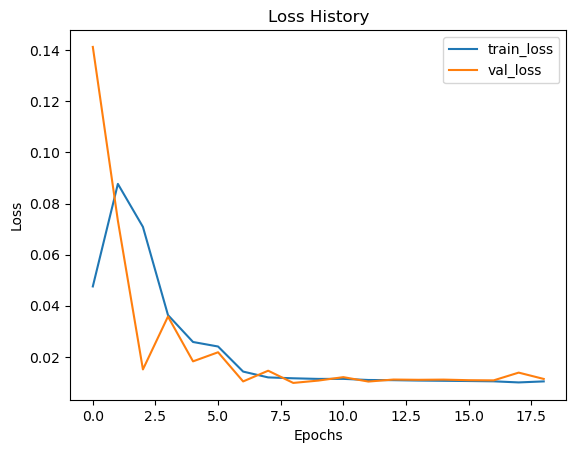

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

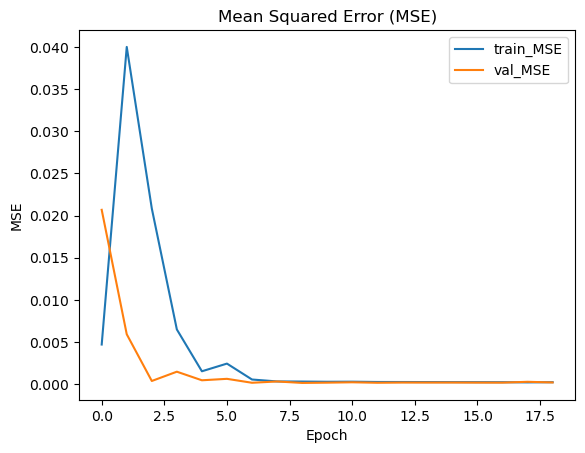

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

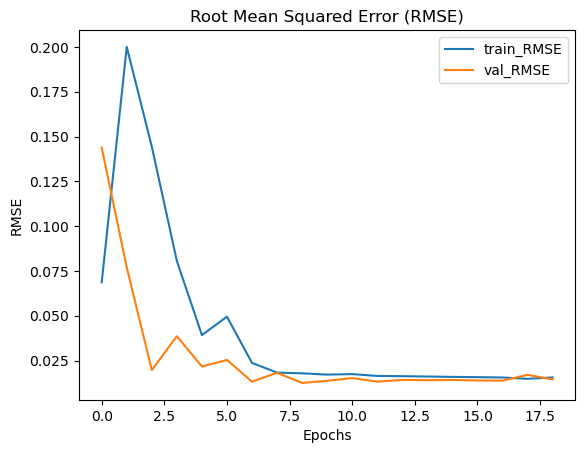

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

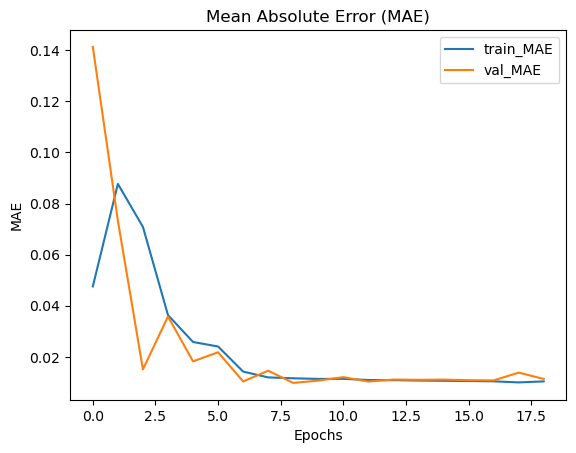

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

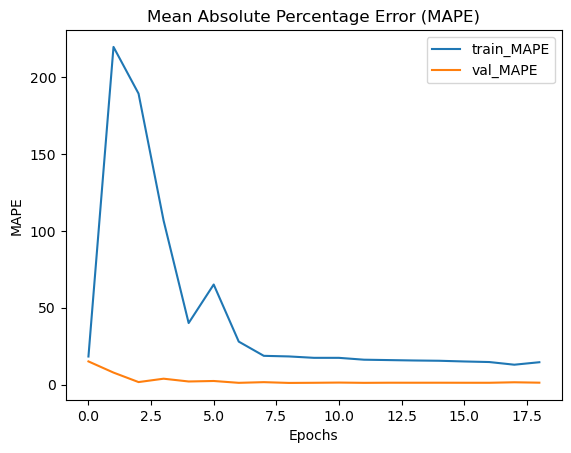

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:48:08.876549: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


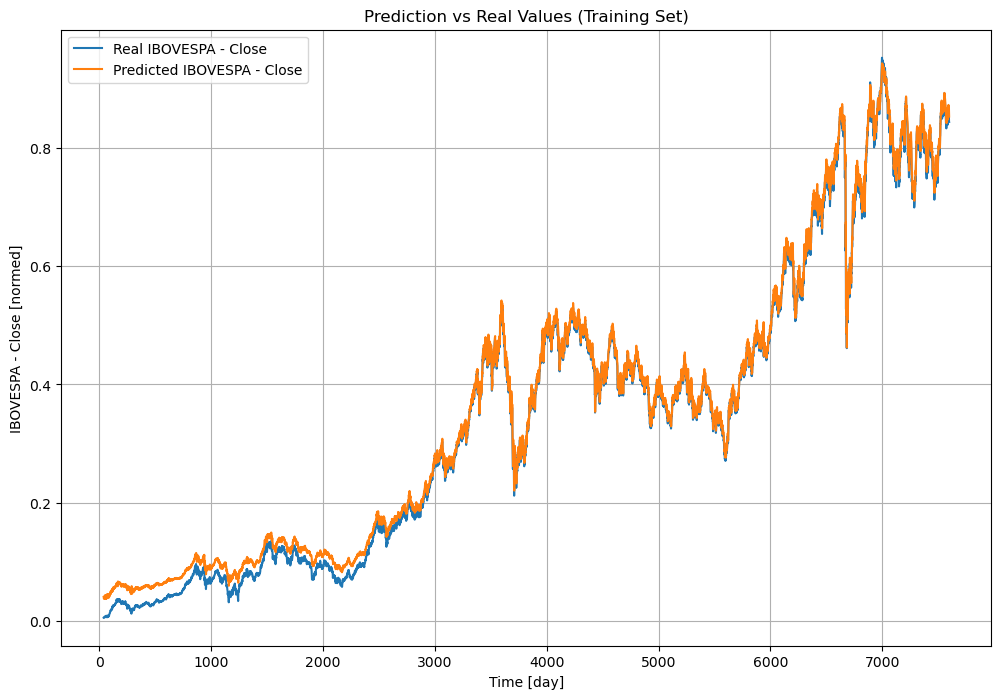

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


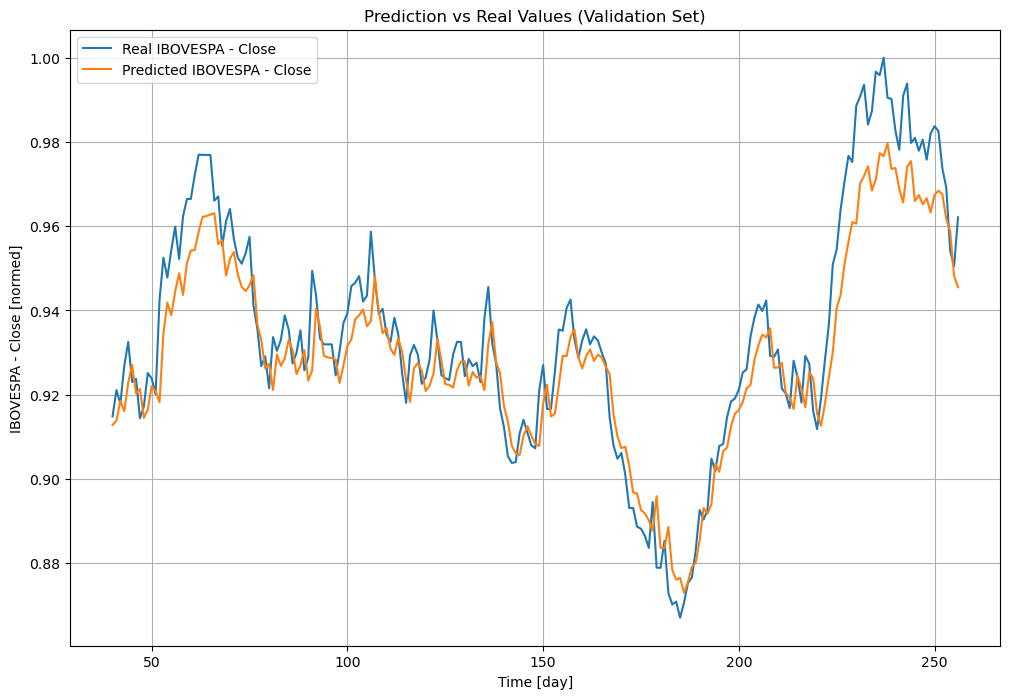

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


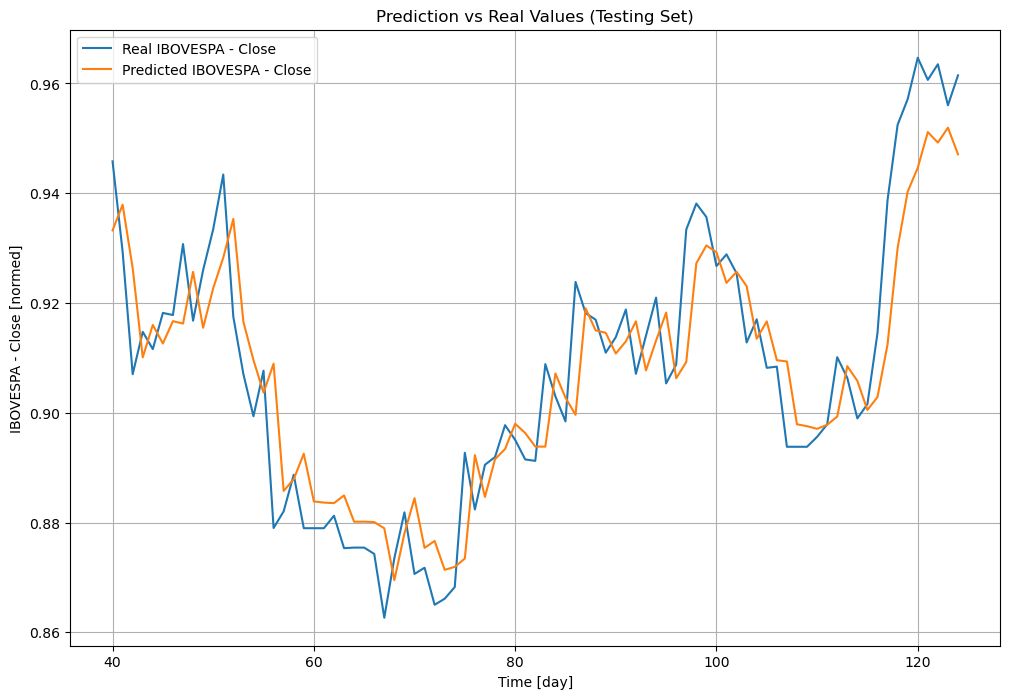

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

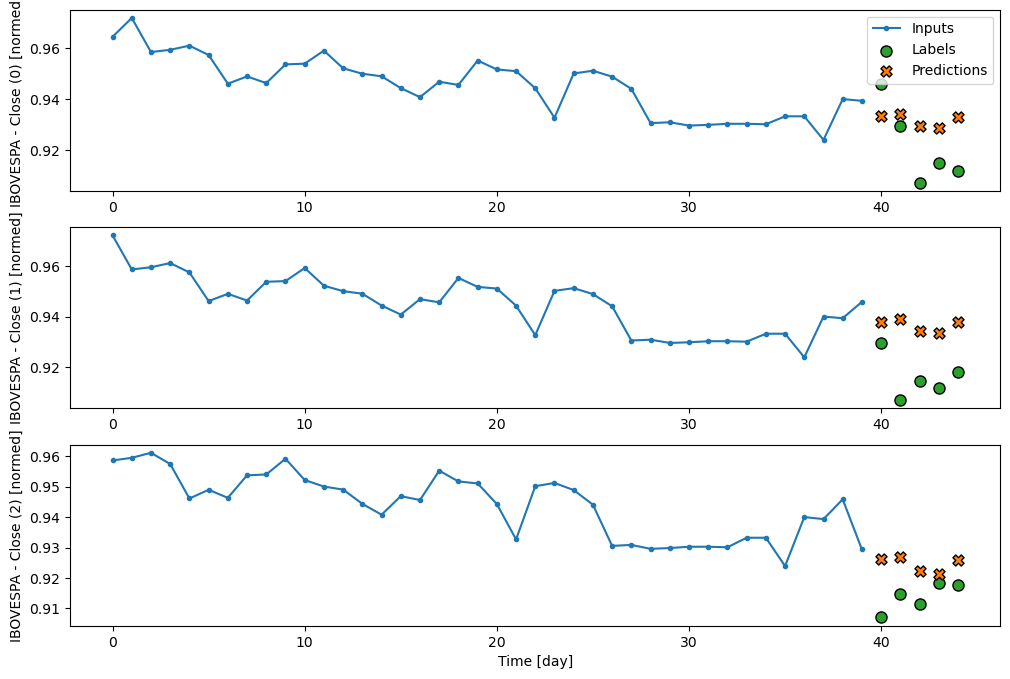

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:30s:685ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step


array([[[0.9332287 , 0.9332287 , 0.9332287 , ..., 0.9332287 ,
         0.9332287 , 0.9332287 ],
        [0.93415856, 0.93415856, 0.93415856, ..., 0.93415856,
         0.93415856, 0.93415856],
        [0.92956007, 0.92956007, 0.92956007, ..., 0.92956007,
         0.92956007, 0.92956007],
        [0.928581  , 0.928581  , 0.928581  , ..., 0.928581  ,
         0.928581  , 0.928581  ],
        [0.93305767, 0.93305767, 0.93305767, ..., 0.93305767,
         0.9330578 , 0.9330578 ]],

       [[0.9379176 , 0.9379176 , 0.9379176 , ..., 0.9379176 ,
         0.9379176 , 0.9379176 ],
        [0.938943  , 0.938943  , 0.938943  , ..., 0.938943  ,
         0.938943  , 0.938943  ],
        [0.93433857, 0.93433857, 0.93433857, ..., 0.93433857,
         0.93433857, 0.93433857],
        [0.93335277, 0.93335277, 0.93335277, ..., 0.93335277,
         0.93335277, 0.93335277],
        [0.9378576 , 0.9378576 , 0.9378576 , ..., 0.9378576 ,
         0.93785775, 0.93785775]],

       [[0.92636347, 0.92636347, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')